<a href="https://colab.research.google.com/github/Prakharprasun/Housing-Prices-Dataset-Analysis/blob/main/Housing_Prices_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#By: Prakhar Prasun

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/ML Datasets for induction tasks/Housing.csv')
data.head(10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df=pd.DataFrame(data)

In [ ]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

df_encoded = pd.get_dummies(df, columns=non_numeric_cols, drop_first=True)
df_encoded

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,True,False,True,False,False,False,False,True
541,1767150,2400,3,1,1,0,False,False,False,False,False,False,True,False
542,1750000,3620,2,1,1,0,True,False,False,False,False,False,False,True
543,1750000,2910,3,1,1,0,False,False,False,False,False,False,False,False


In [ ]:
bool_cols = df_encoded.select_dtypes(include='bool').columns
print("Boolean Columns:", bool_cols)

df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

df_encoded

Boolean Columns: Index(['mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [ ]:
for col in df_encoded.columns:
  print(col)

price
area
bedrooms
bathrooms
stories
parking
mainroad_yes
guestroom_yes
basement_yes
hotwaterheating_yes
airconditioning_yes
prefarea_yes
furnishingstatus_semi-furnished
furnishingstatus_unfurnished


In [ ]:
df_encoded['PriceperArea']=(df_encoded['price']/df_encoded['area'])
df_encoded['TotalRooms']=(df_encoded['bedrooms']+df_encoded['bathrooms']+df_encoded['parking']+df_encoded['guestroom_yes']+df_encoded['basement_yes'])

In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_cols = df_encoded.select_dtypes(include=['number']).columns

scaler = StandardScaler()

df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

In [ ]:
df_encoded

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,PriceperArea,TotalRooms
0,4.566365,1.046726,1.403419,1.421812,1.378217,1.517692,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.804941,-0.844888,-0.696429,2.308152,1.475590
1,4.004484,1.757010,1.403419,5.405809,2.532024,2.679409,0.405623,-0.465315,-0.734539,-0.219265,1.472618,-0.554035,-0.844888,-0.696429,1.079838,3.227653
2,4.004484,2.218232,0.047278,1.421812,0.224410,1.517692,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.804941,1.183588,-0.696429,0.683361,1.475590
3,3.985755,1.083624,1.403419,1.421812,0.224410,2.679409,0.405623,-0.465315,1.361397,-0.219265,1.472618,1.804941,-0.844888,-0.696429,1.835081,2.643632
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1.517692,0.405623,2.149083,1.361397,-0.219265,1.472618,-0.554035,-0.844888,-0.696429,1.572441,2.059611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.576868,-0.991879,-1.308863,-0.570187,-0.929397,1.517692,0.405623,-0.465315,1.361397,-0.219265,-0.679063,-0.554035,-0.844888,1.435896,-1.116809,0.307549
541,-1.605149,-1.268613,0.047278,-0.570187,-0.929397,-0.805741,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.554035,1.183588,-0.696429,-0.742347,-0.860493
542,-1.614327,-0.705921,-1.308863,-0.570187,-0.929397,-0.805741,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.554035,-0.844888,1.435896,-1.472772,-1.444514
543,-1.614327,-1.033389,0.047278,-0.570187,-0.929397,-0.805741,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.554035,-0.844888,-0.696429,-1.132094,-0.860493


In [ ]:
X_train=df_encoded.drop('prefarea_yes',axis=1)
y_train=data['prefarea']

In [ ]:
X_train

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,PriceperArea,TotalRooms
0,4.566365,1.046726,1.403419,1.421812,1.378217,1.517692,0.405623,-0.465315,-0.734539,-0.219265,1.472618,-0.844888,-0.696429,2.308152,1.475590
1,4.004484,1.757010,1.403419,5.405809,2.532024,2.679409,0.405623,-0.465315,-0.734539,-0.219265,1.472618,-0.844888,-0.696429,1.079838,3.227653
2,4.004484,2.218232,0.047278,1.421812,0.224410,1.517692,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.183588,-0.696429,0.683361,1.475590
3,3.985755,1.083624,1.403419,1.421812,0.224410,2.679409,0.405623,-0.465315,1.361397,-0.219265,1.472618,-0.844888,-0.696429,1.835081,2.643632
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1.517692,0.405623,2.149083,1.361397,-0.219265,1.472618,-0.844888,-0.696429,1.572441,2.059611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.576868,-0.991879,-1.308863,-0.570187,-0.929397,1.517692,0.405623,-0.465315,1.361397,-0.219265,-0.679063,-0.844888,1.435896,-1.116809,0.307549
541,-1.605149,-1.268613,0.047278,-0.570187,-0.929397,-0.805741,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,1.183588,-0.696429,-0.742347,-0.860493
542,-1.614327,-0.705921,-1.308863,-0.570187,-0.929397,-0.805741,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.844888,1.435896,-1.472772,-1.444514
543,-1.614327,-1.033389,0.047278,-0.570187,-0.929397,-0.805741,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.844888,-0.696429,-1.132094,-0.860493


In [ ]:
y_train=pd.DataFrame(y_train)

In [ ]:
y_train["prefarea"] = y_train["prefarea"].replace({'no': 0, 'yes': 1})

print(y_train["prefarea"].value_counts())

prefarea
0    417
1    128
Name: count, dtype: int64


In [ ]:
split_1 = int(0.6 * len(X_train))
split_2 = int(0.8 * len(X_train))

X_train, X_val, X_test = X_train[:split_1], X_train[split_1:split_2], X_train[split_2:]
y_train, y_val, y_test = y_train[:split_1], y_train[split_1:split_2], y_train[split_2:]

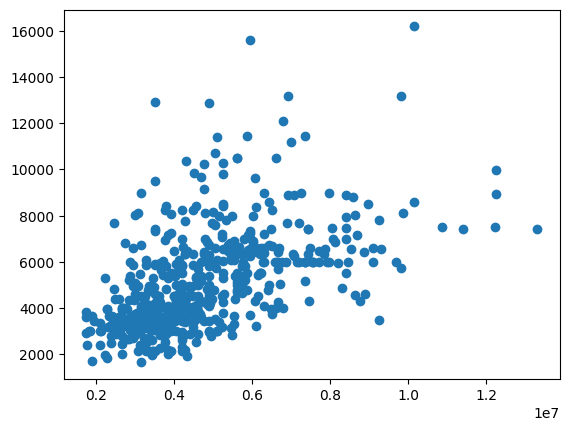

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['price'],df['area'])

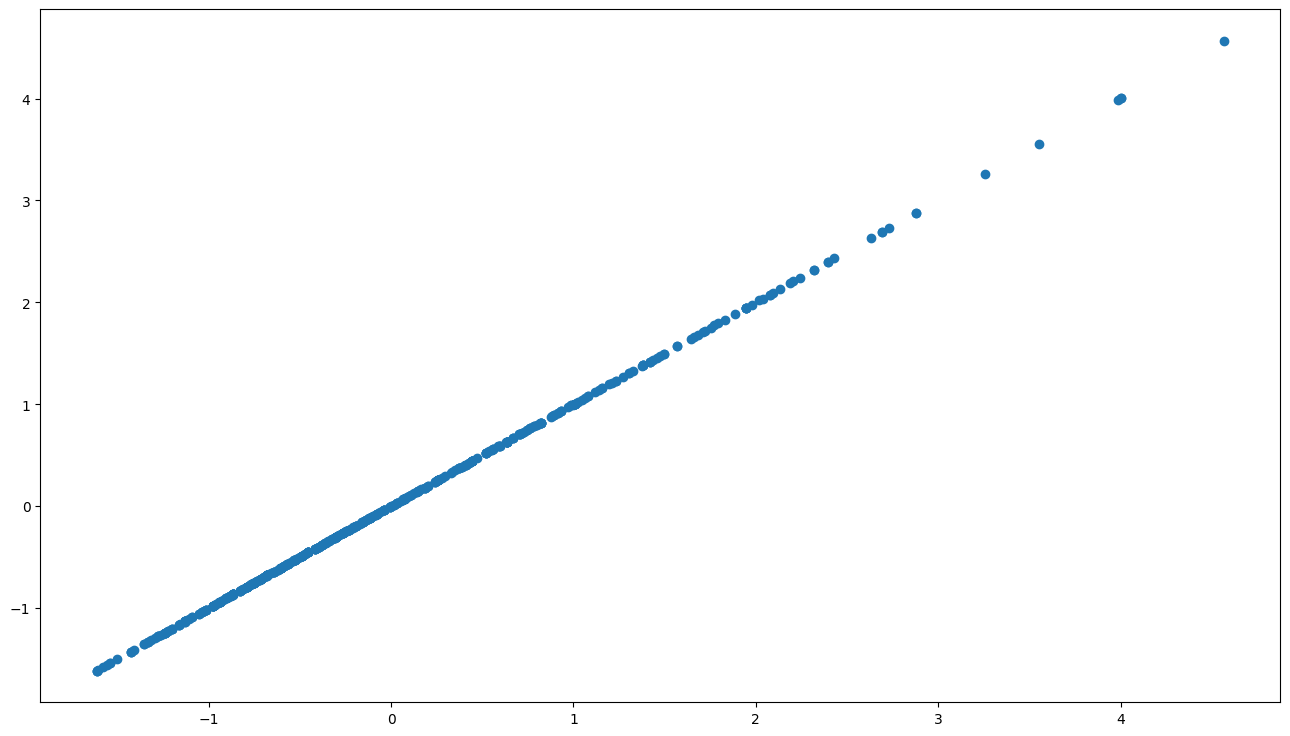

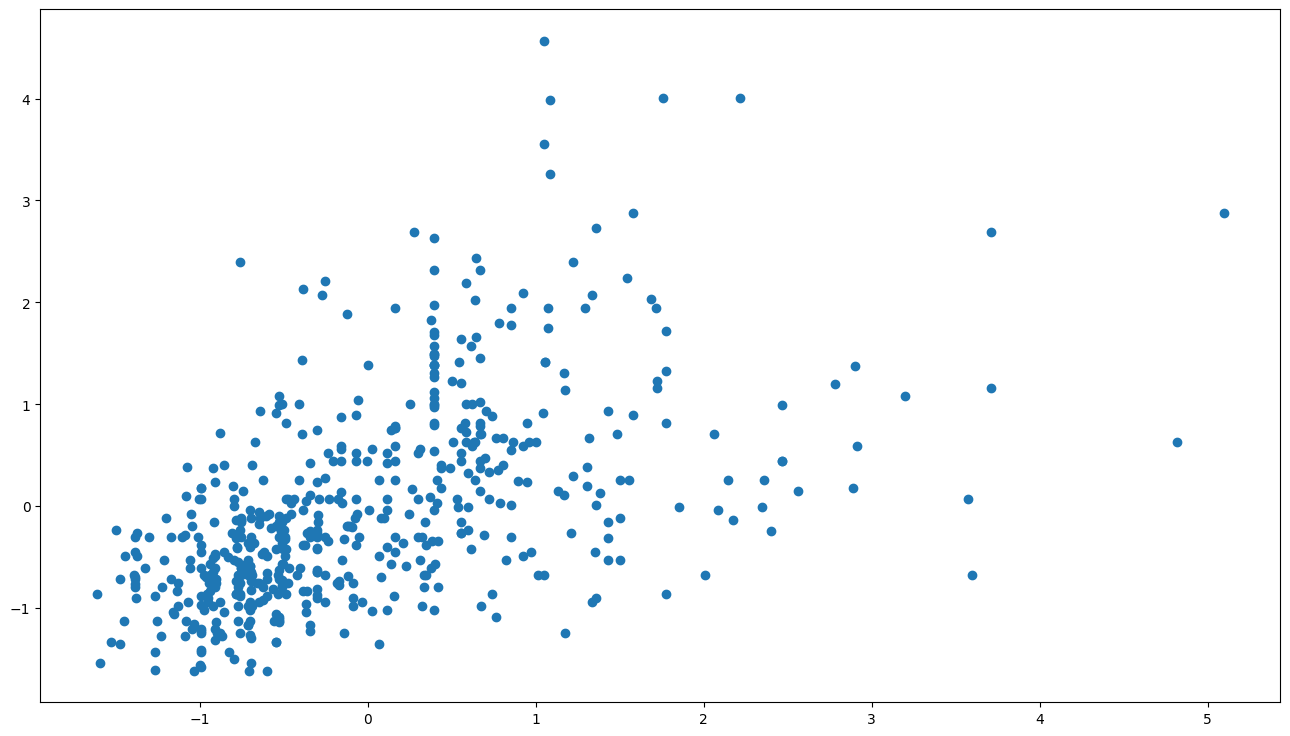

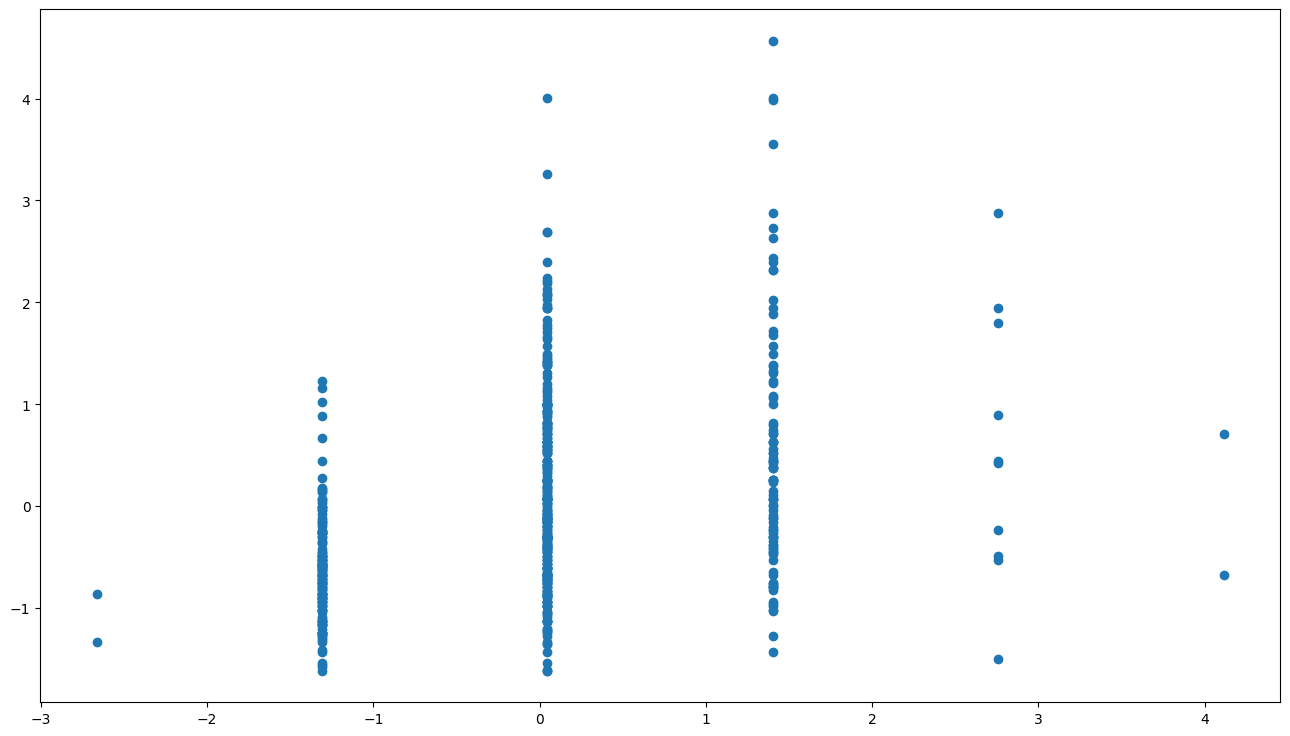

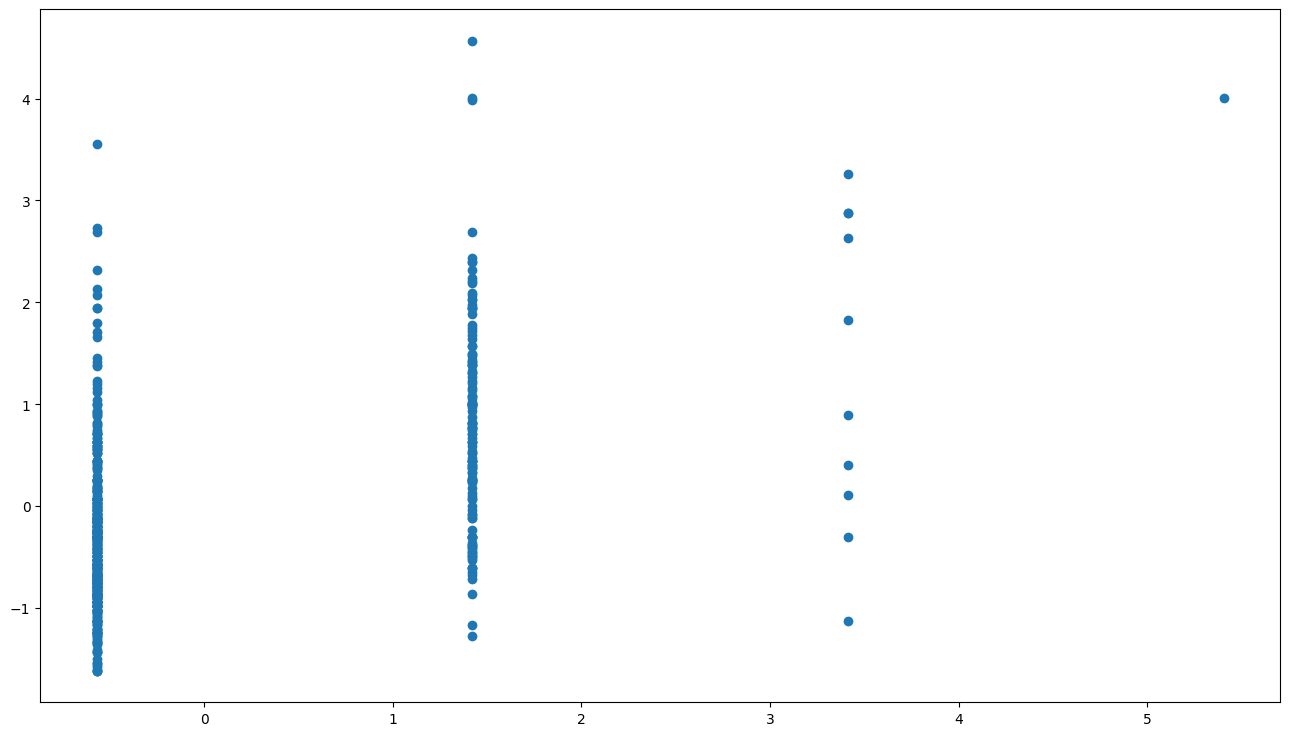

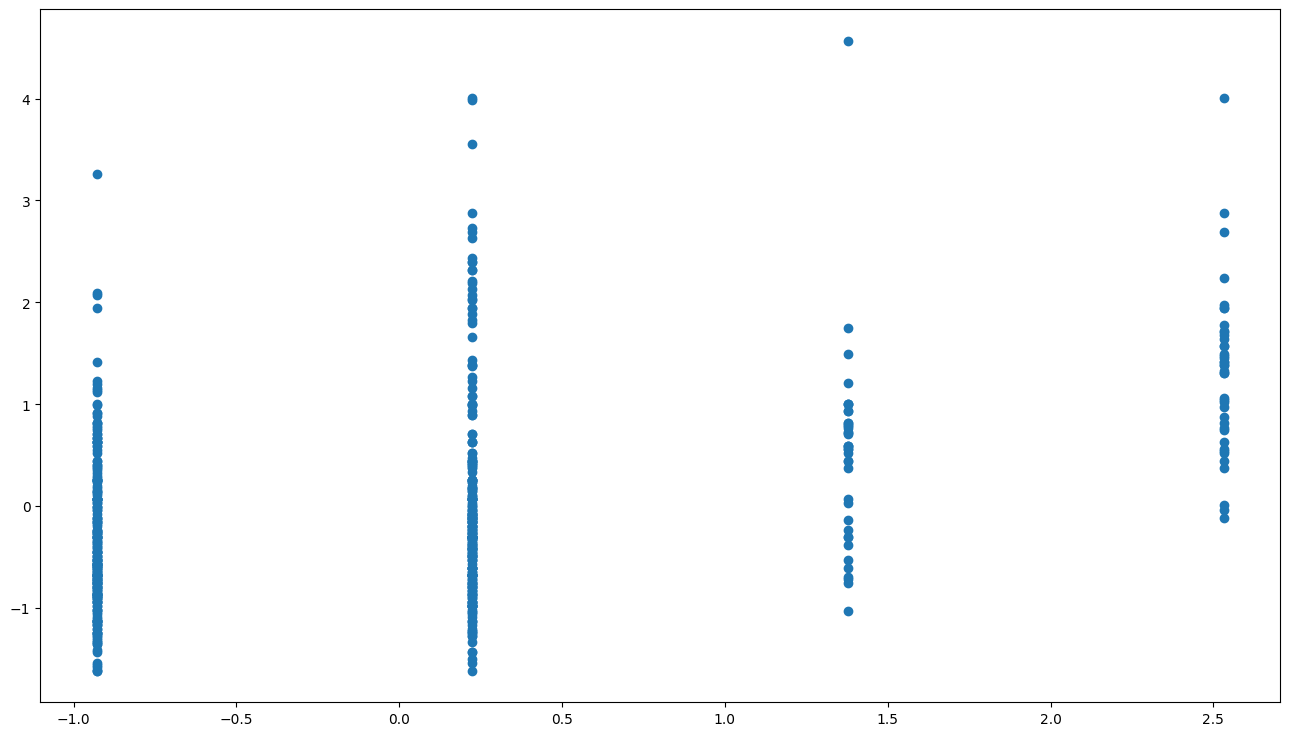

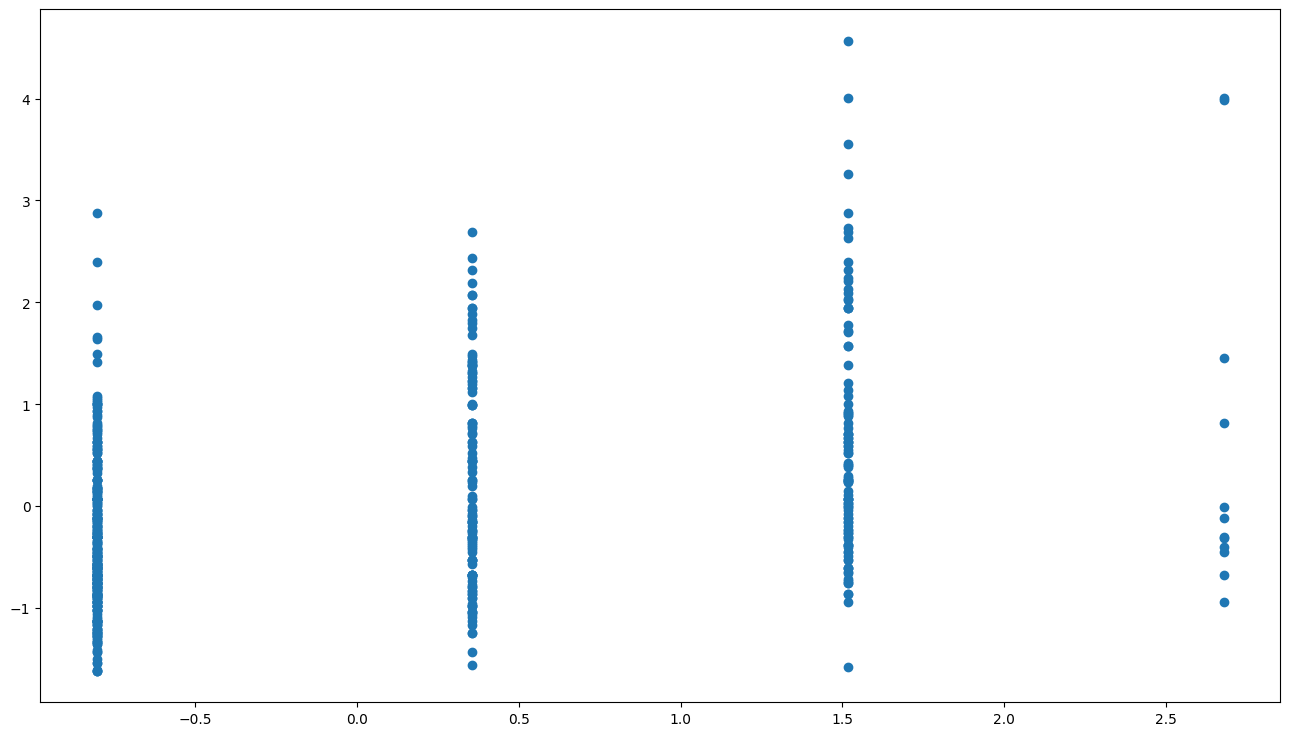

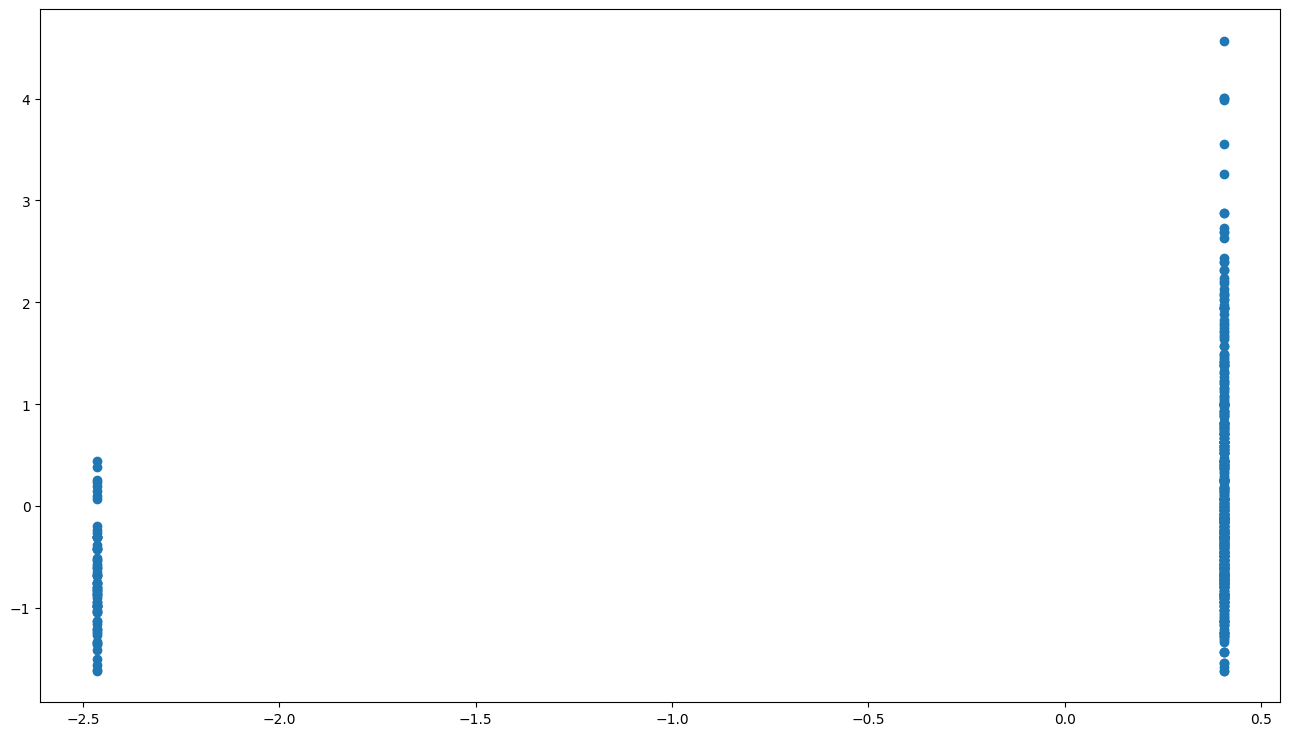

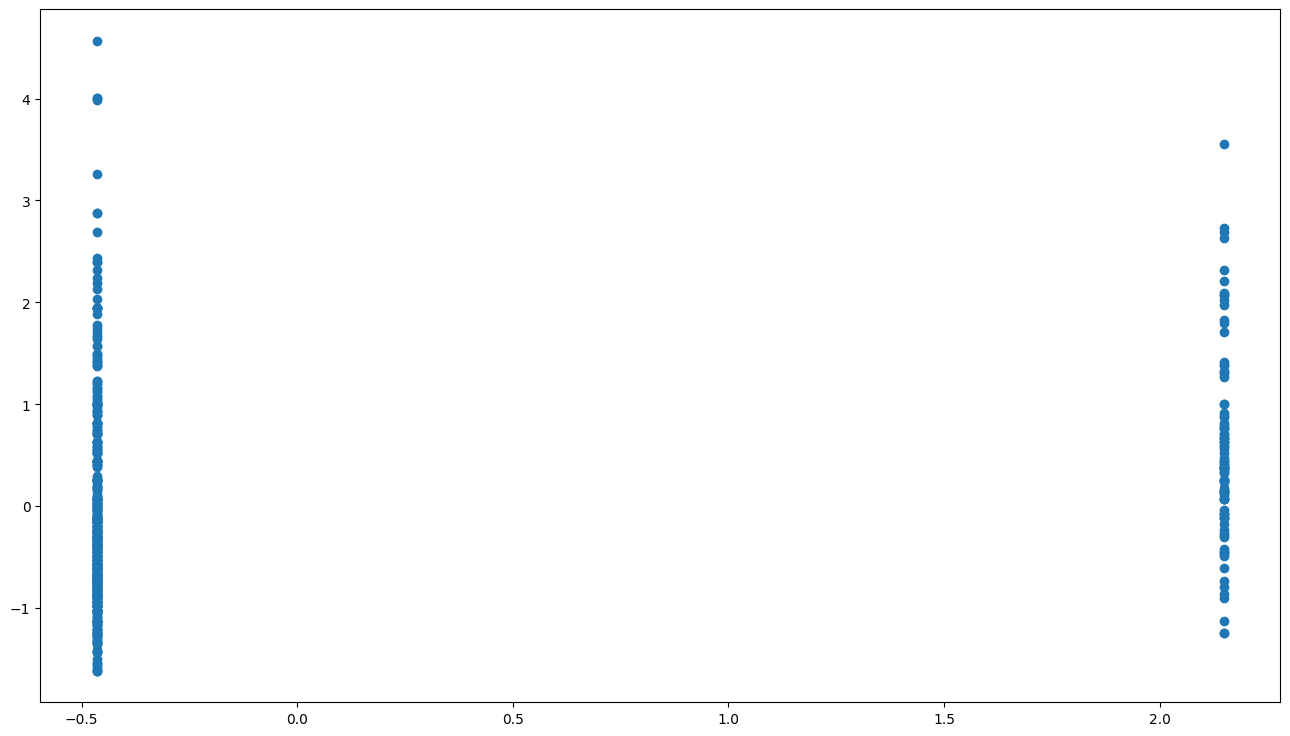

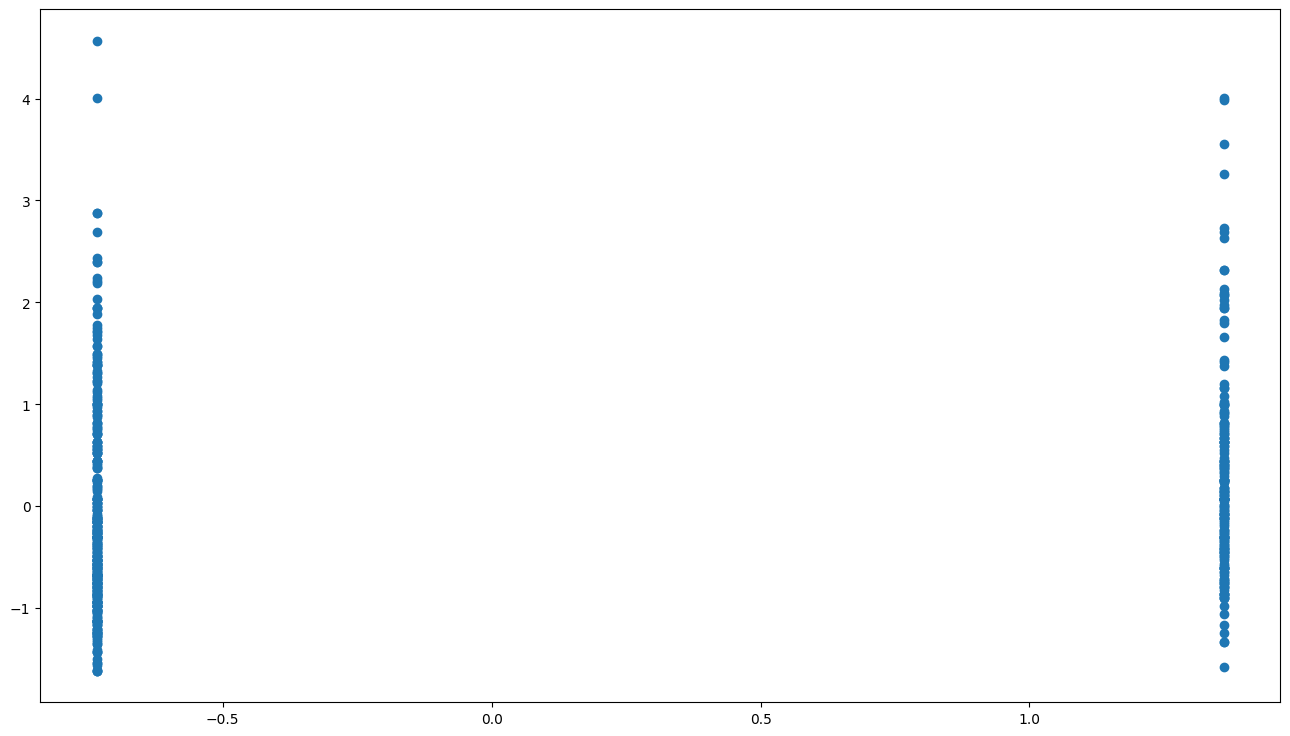

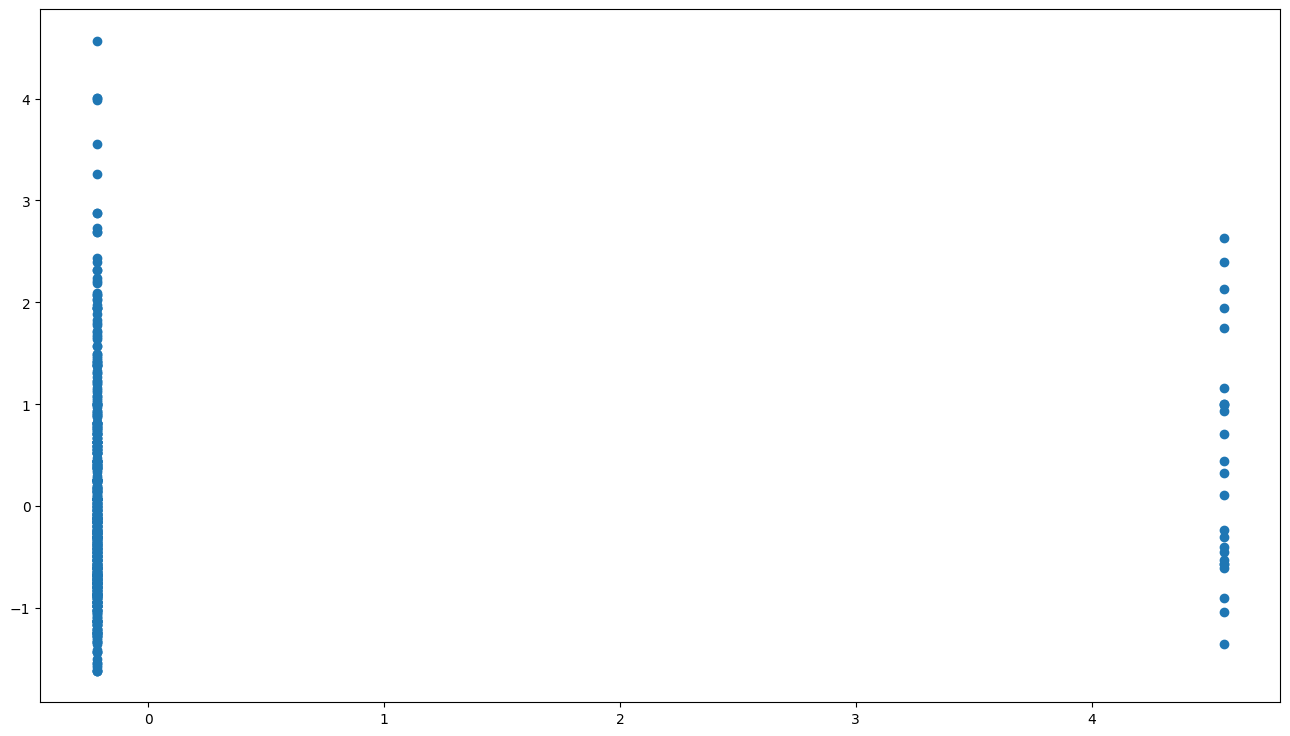

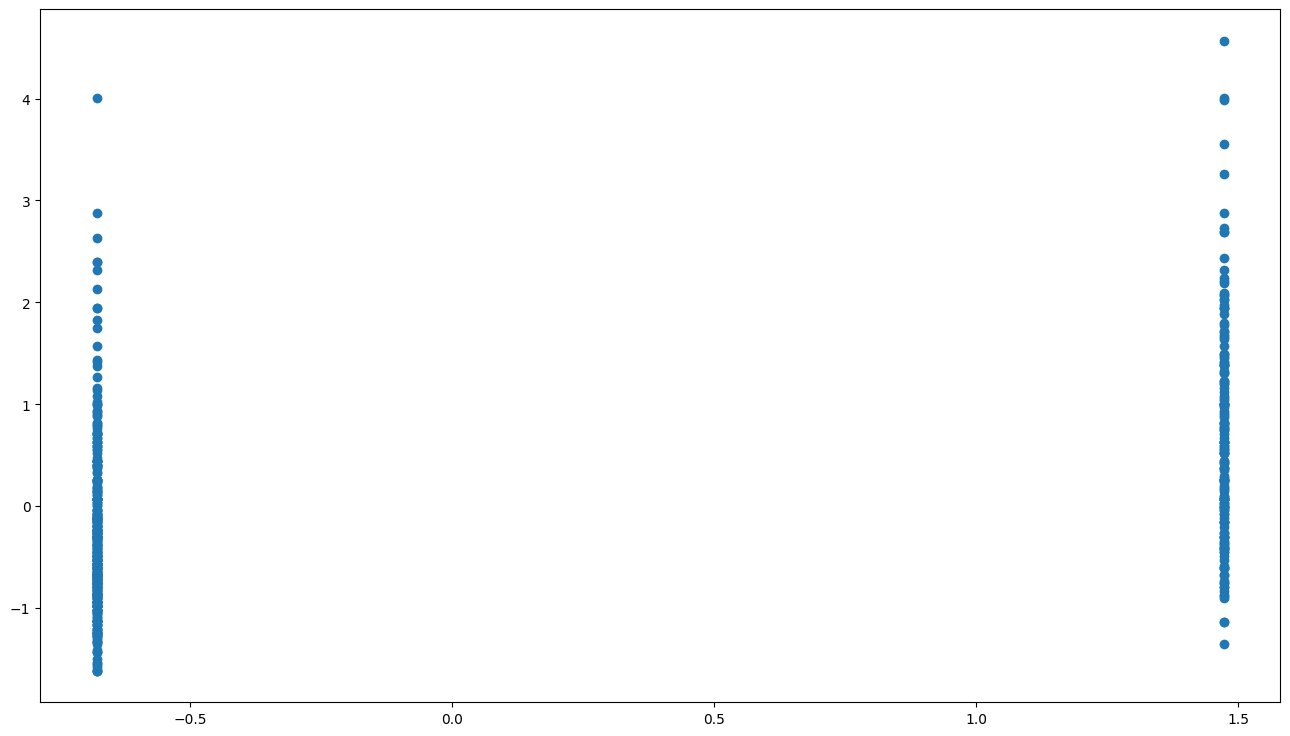

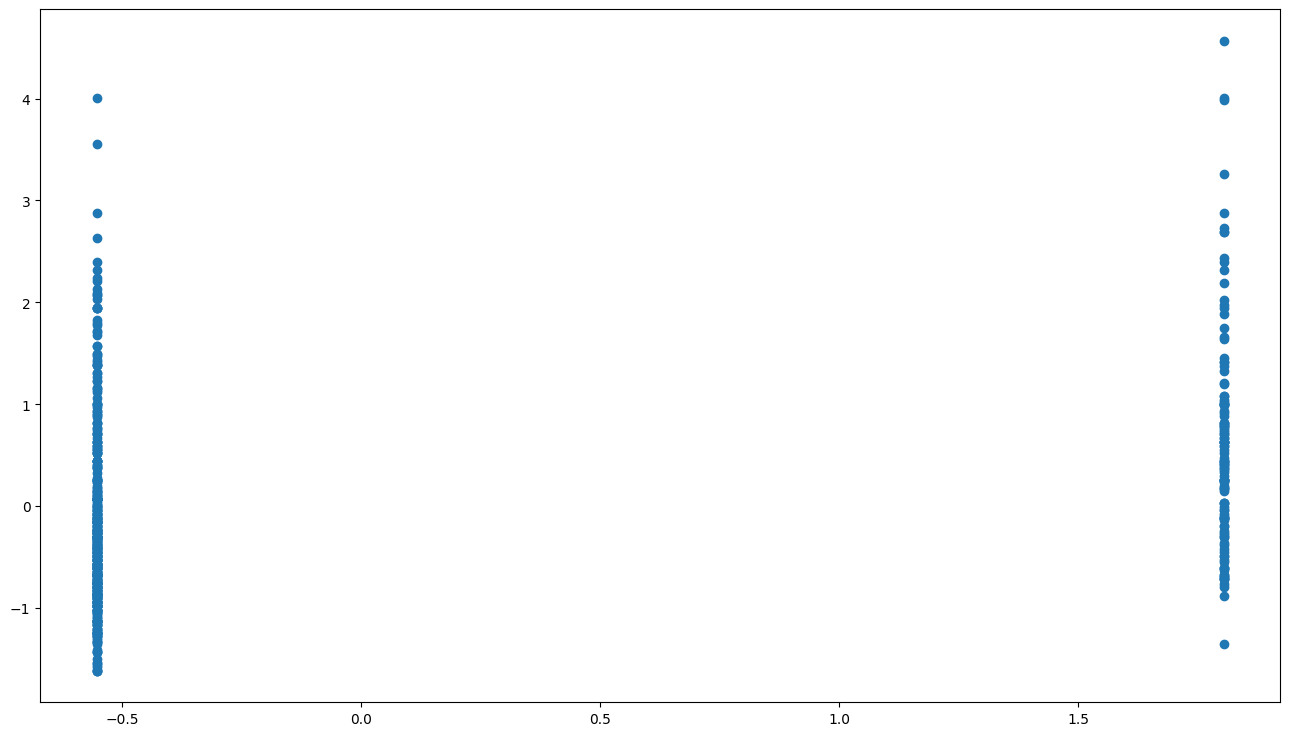

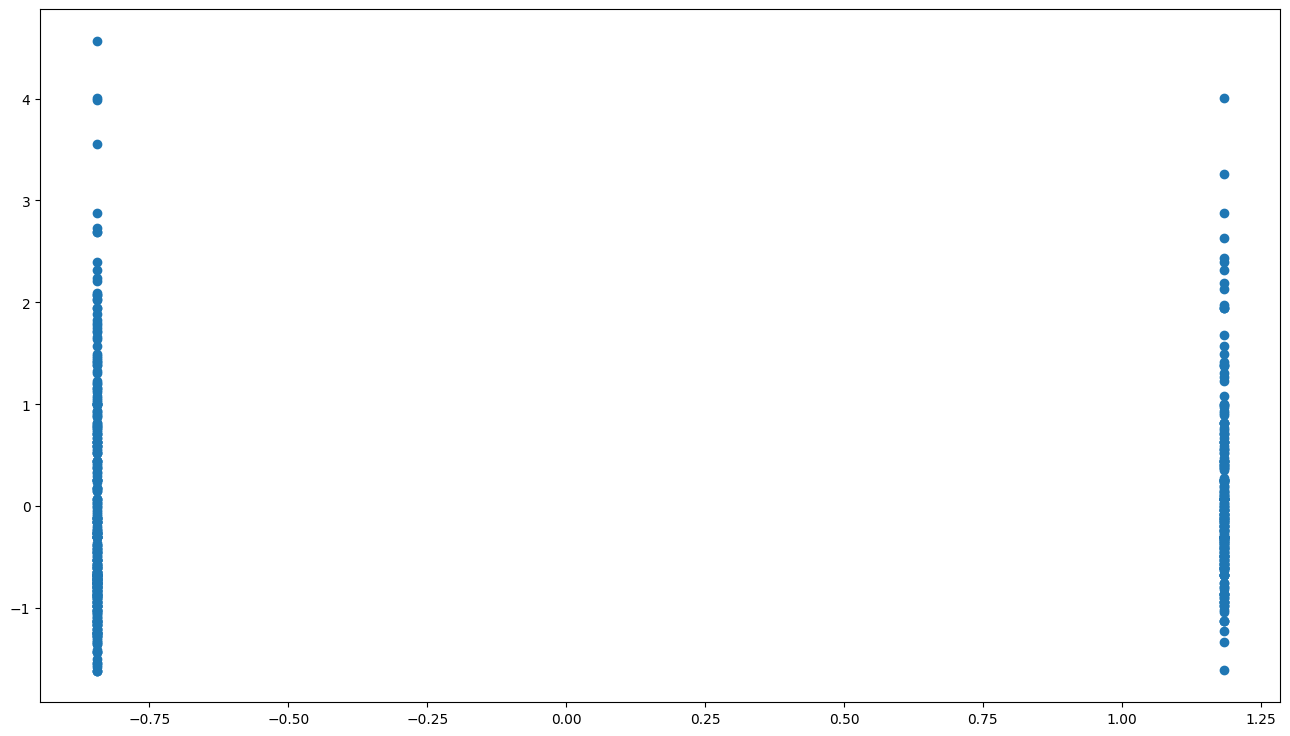

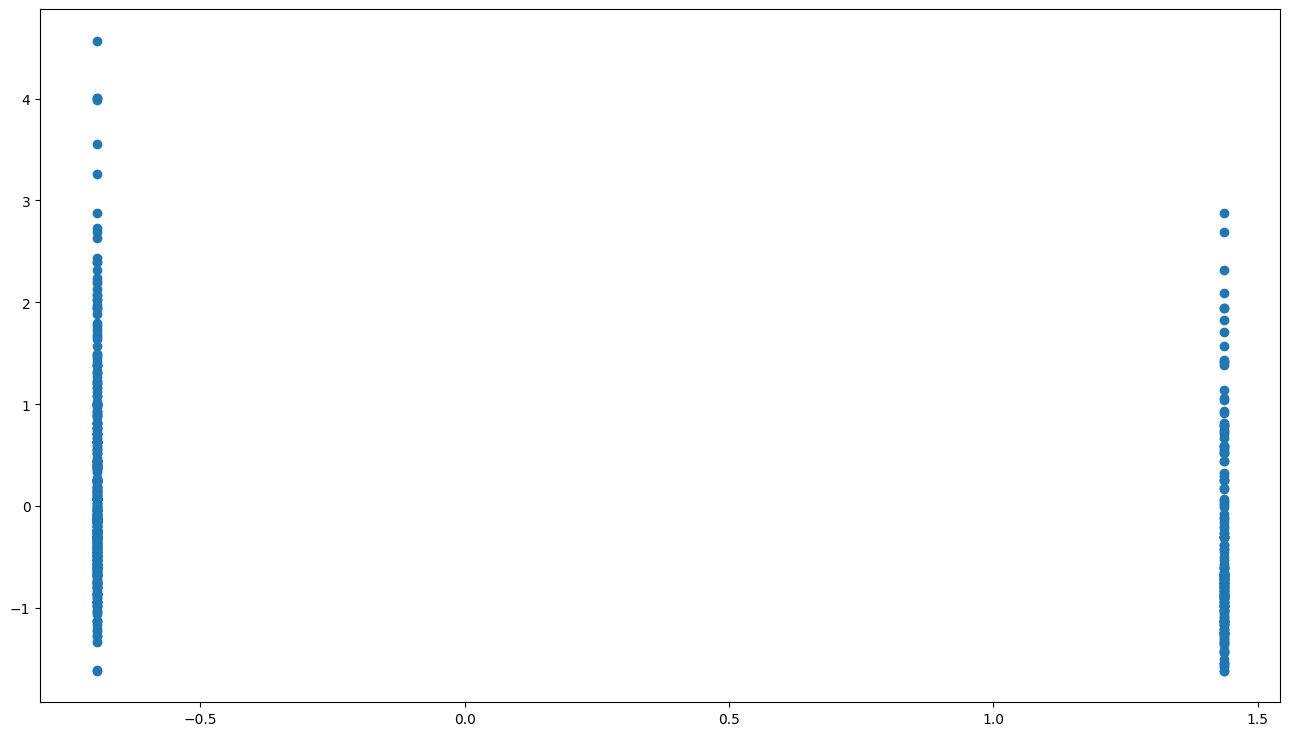

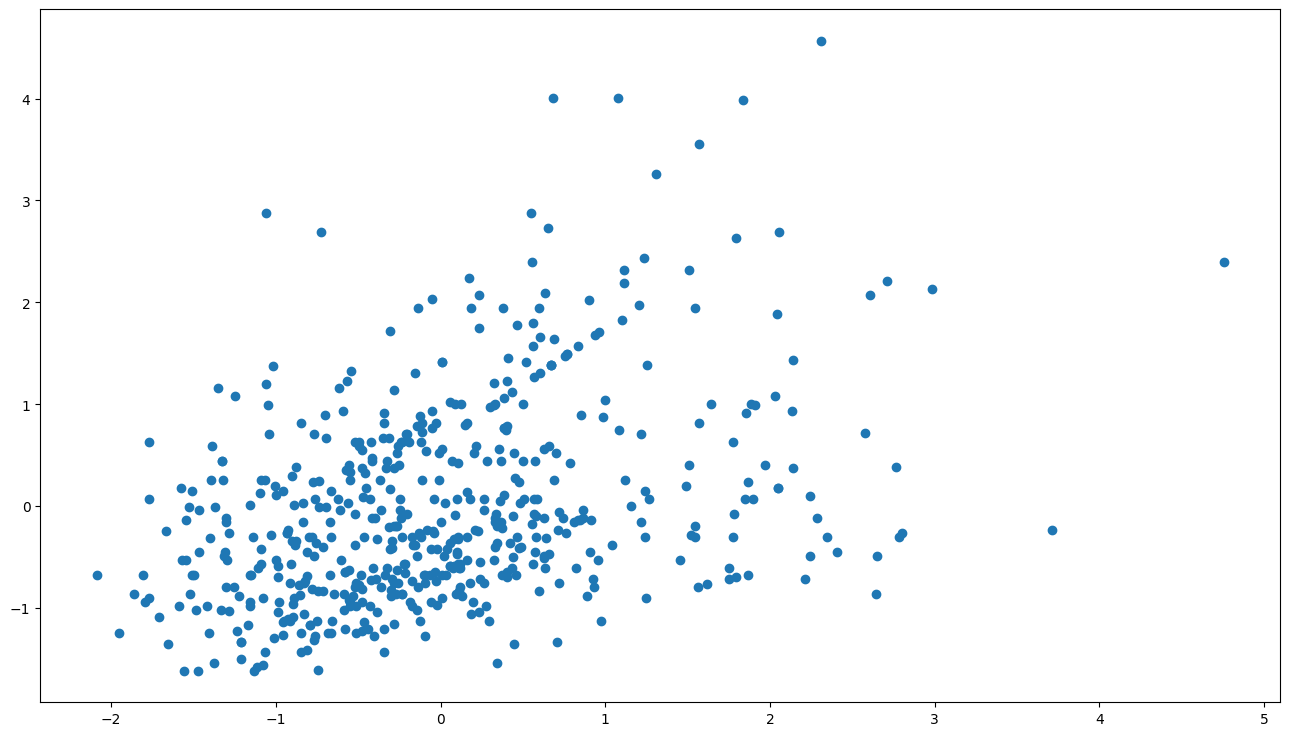

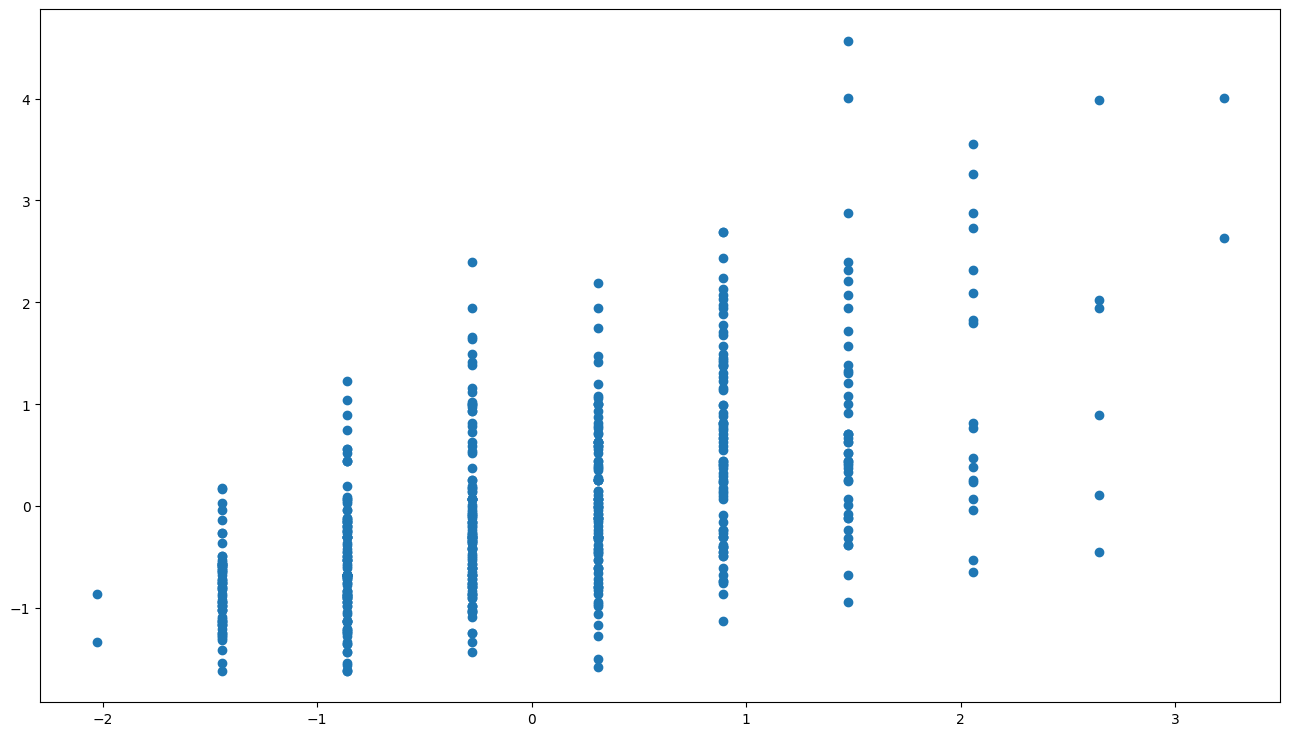

In [ ]:
for feature in df_encoded.columns:
    plt.figure(figsize=(16, 9))
    plt.scatter(df_encoded[feature], df_encoded['price'])
    plt.show()

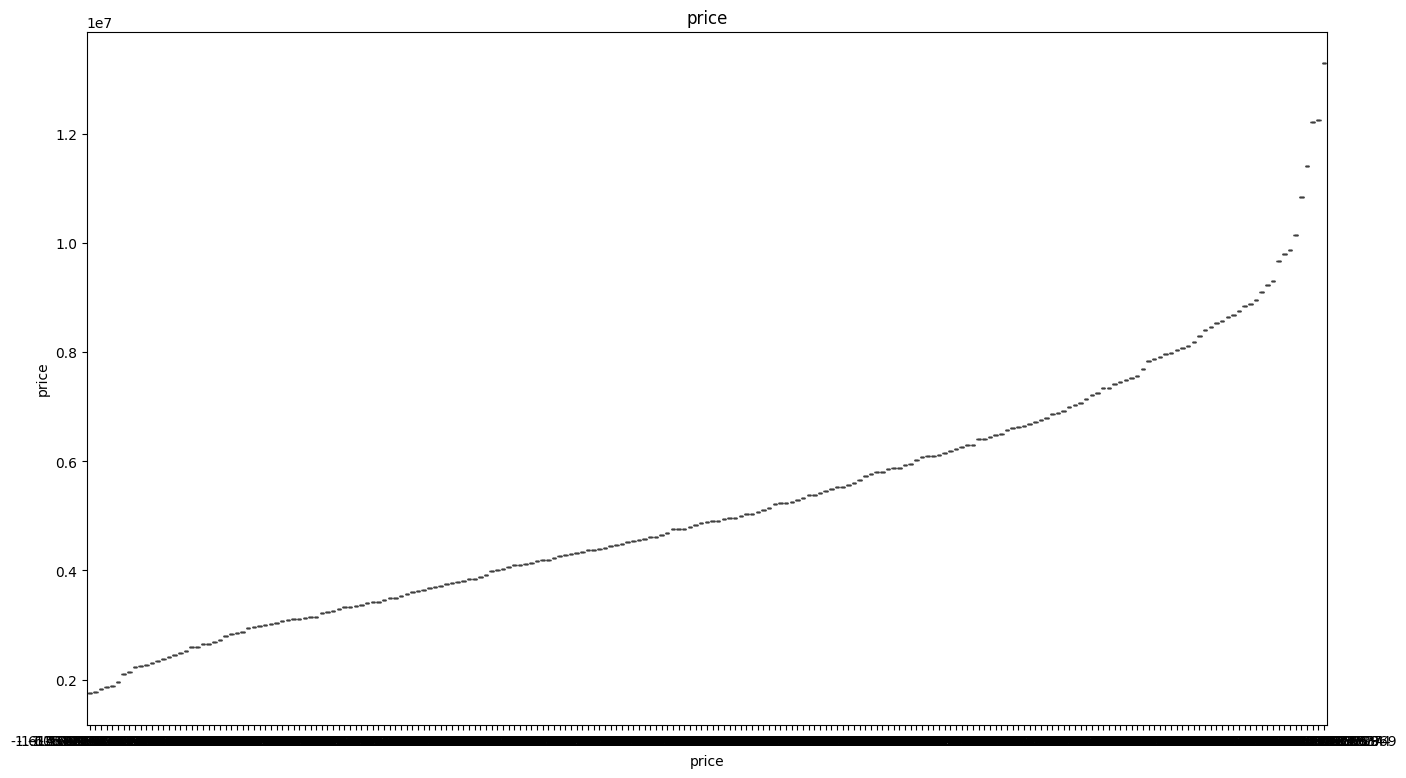

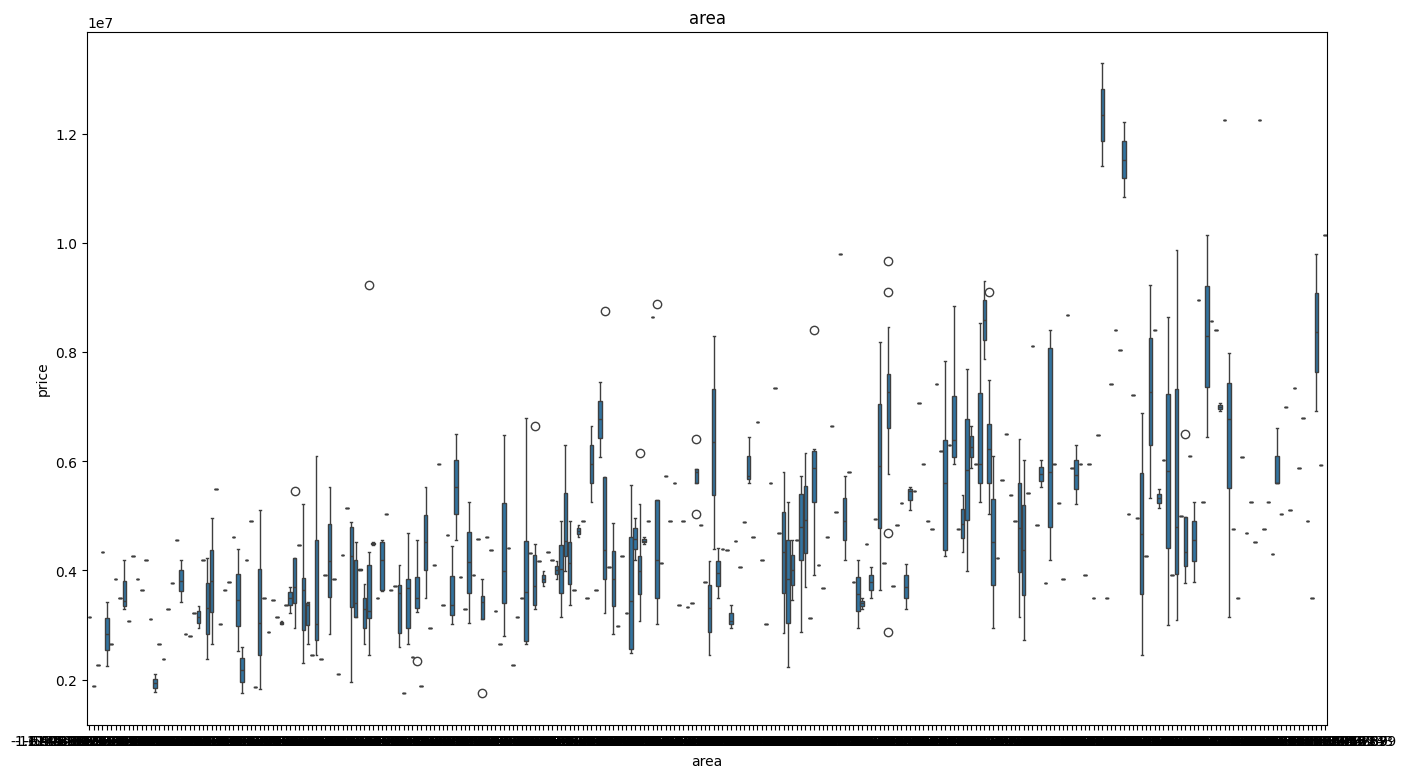

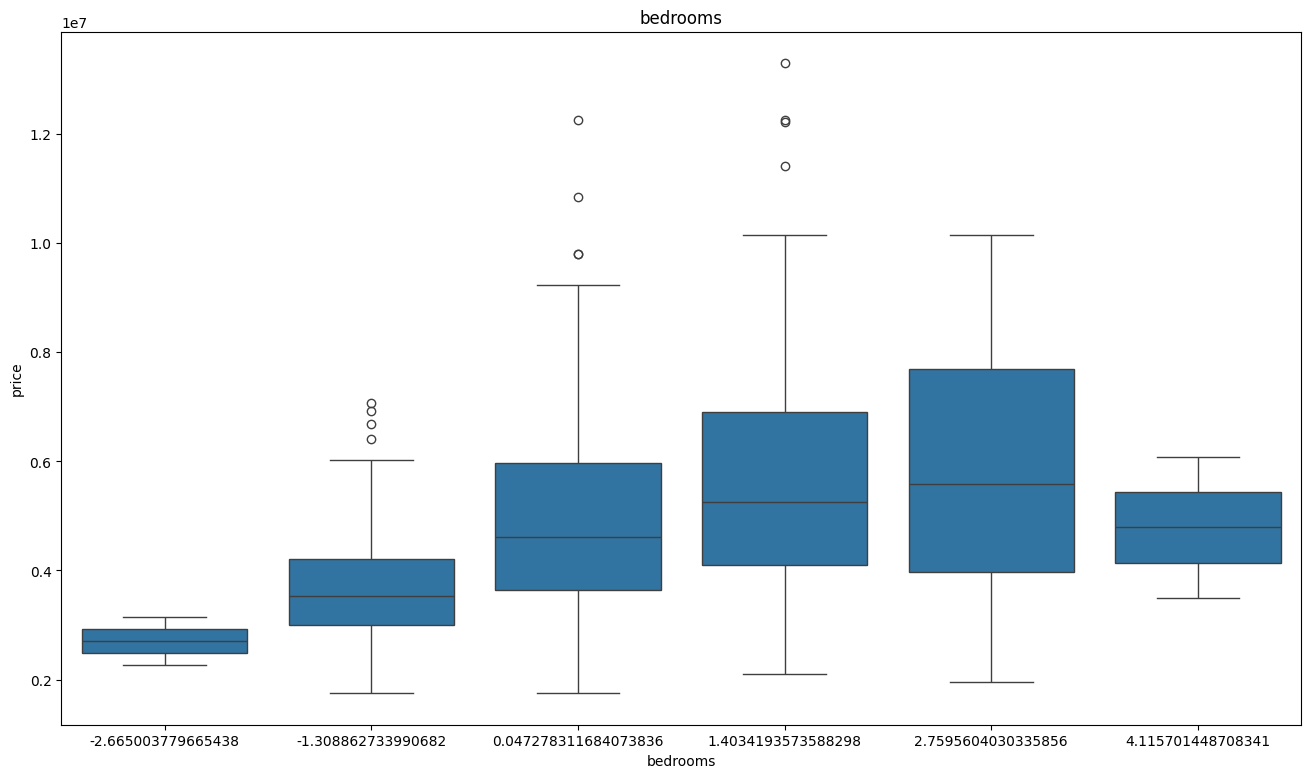

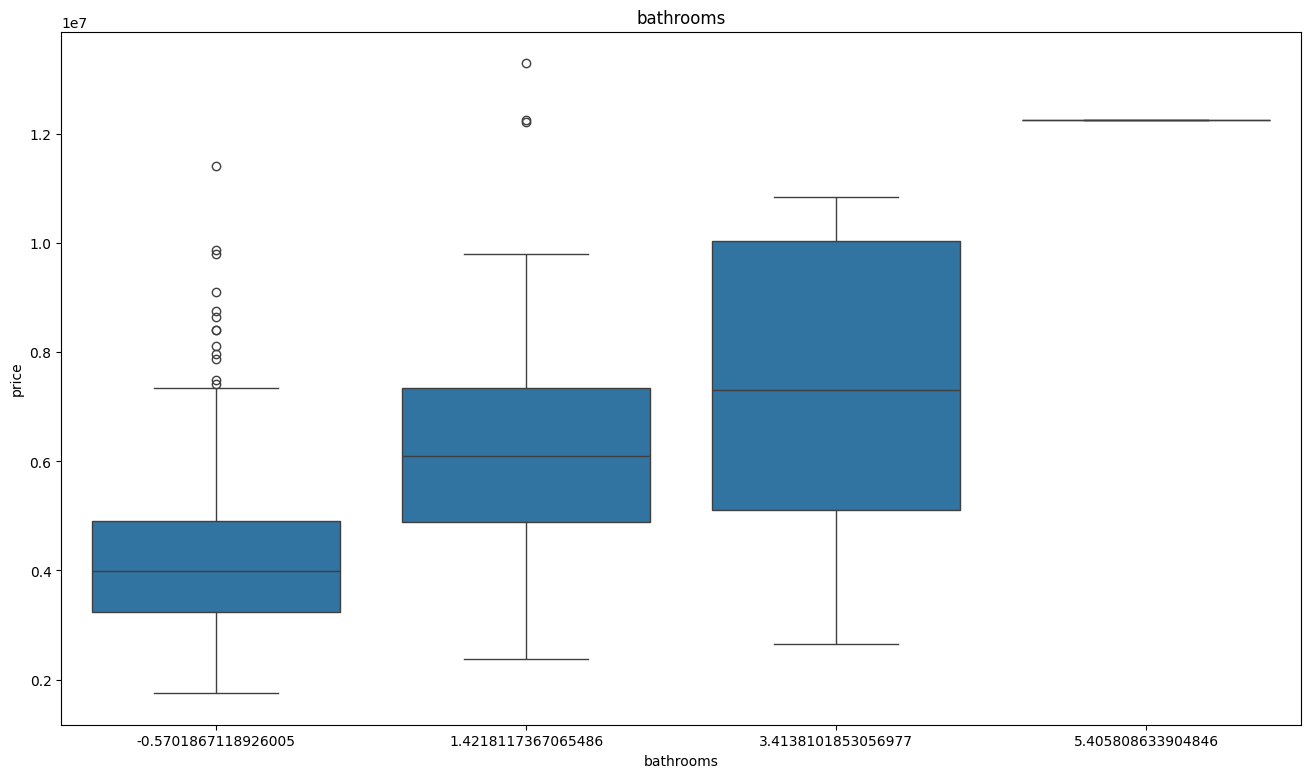

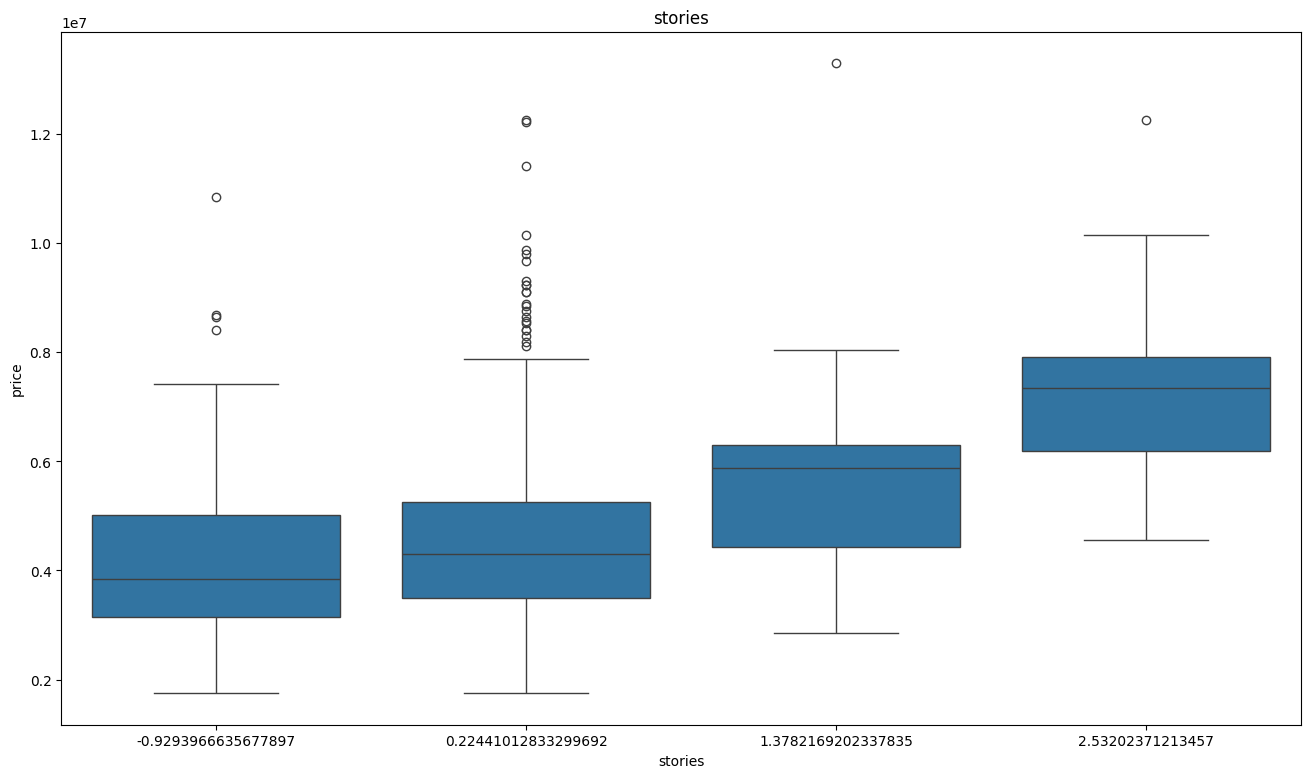

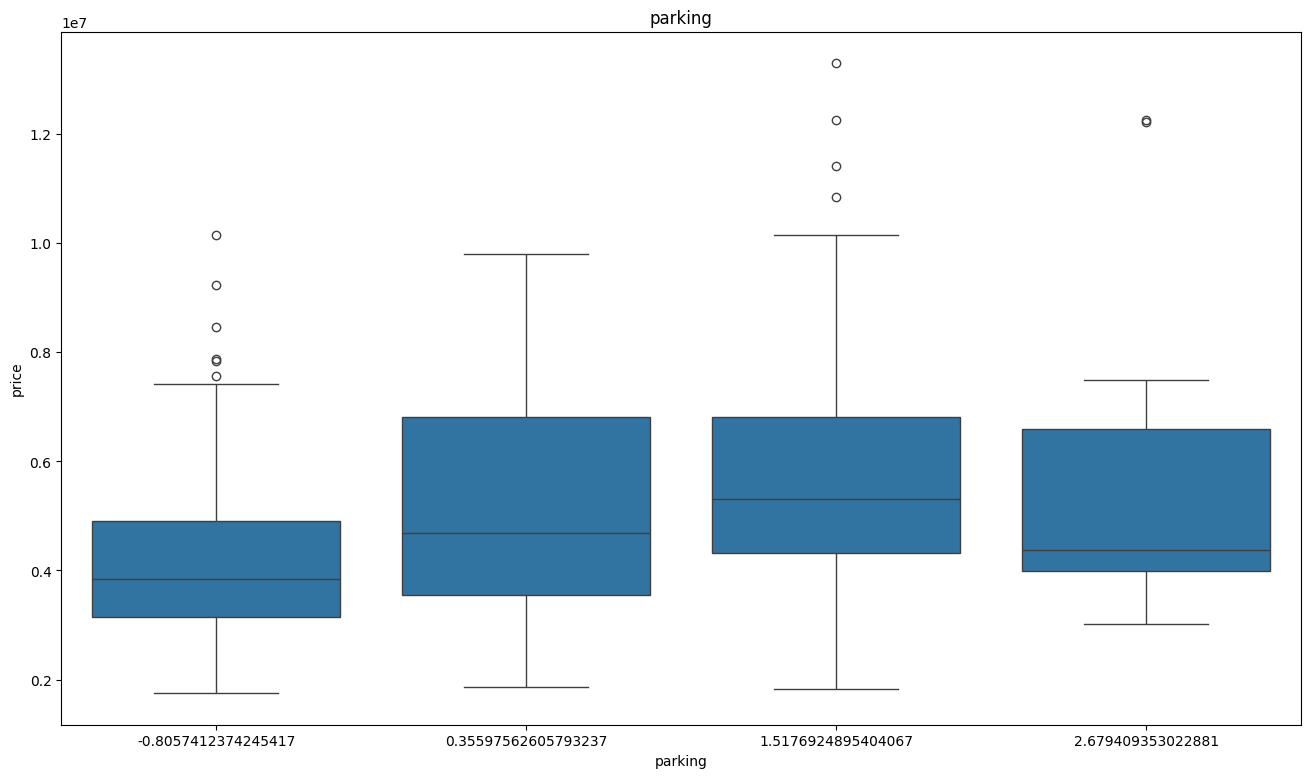

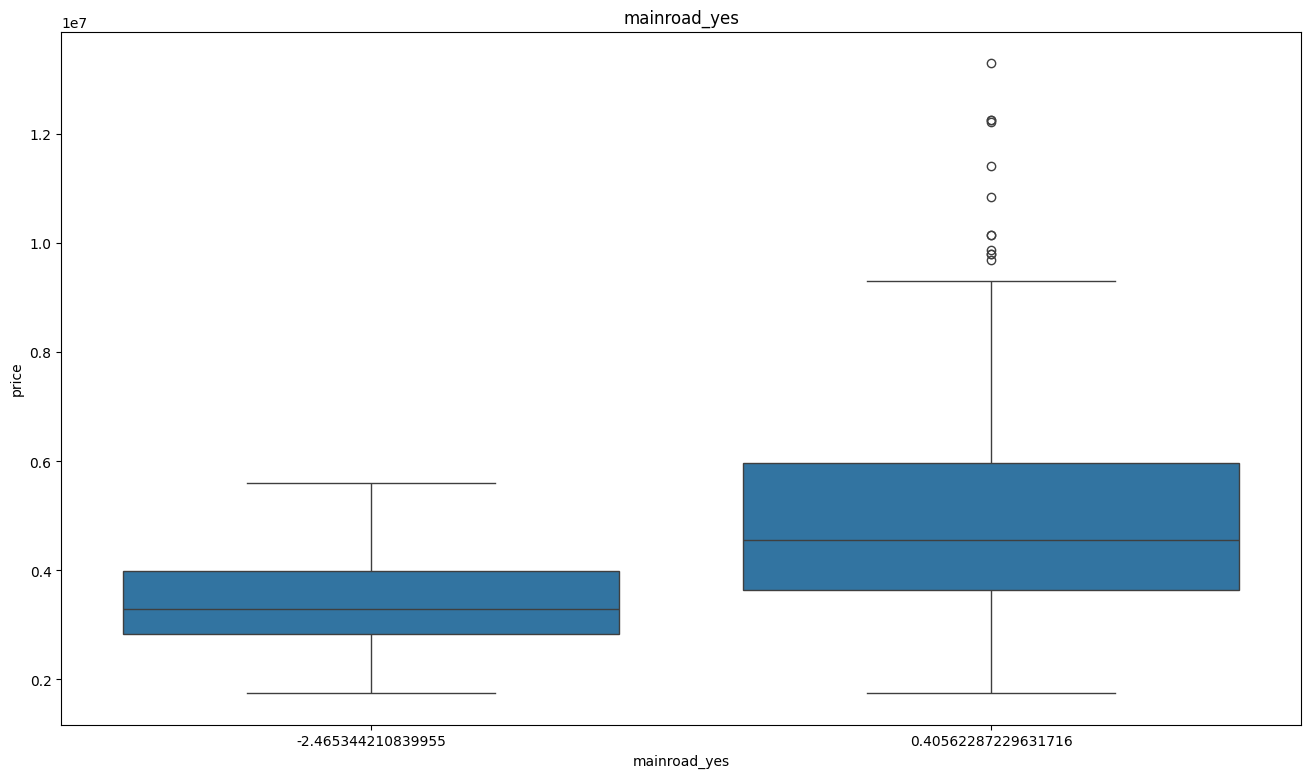

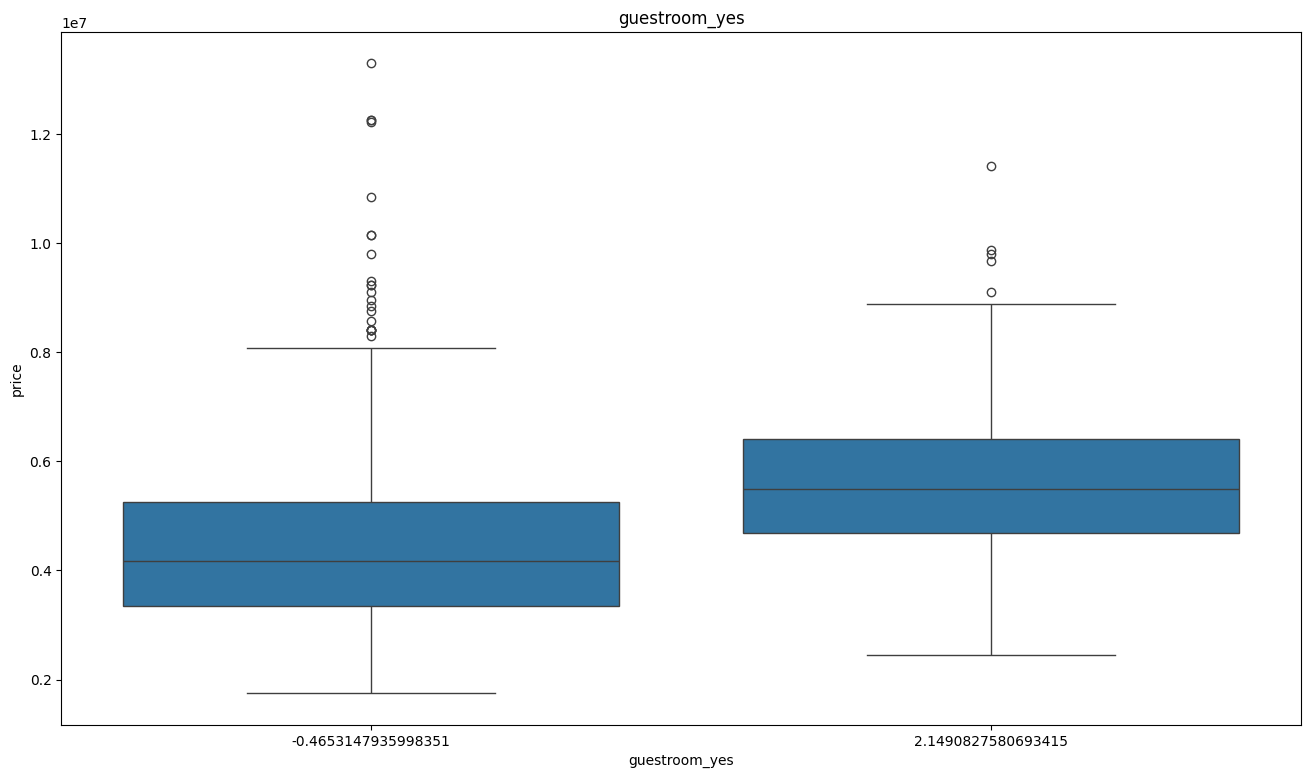

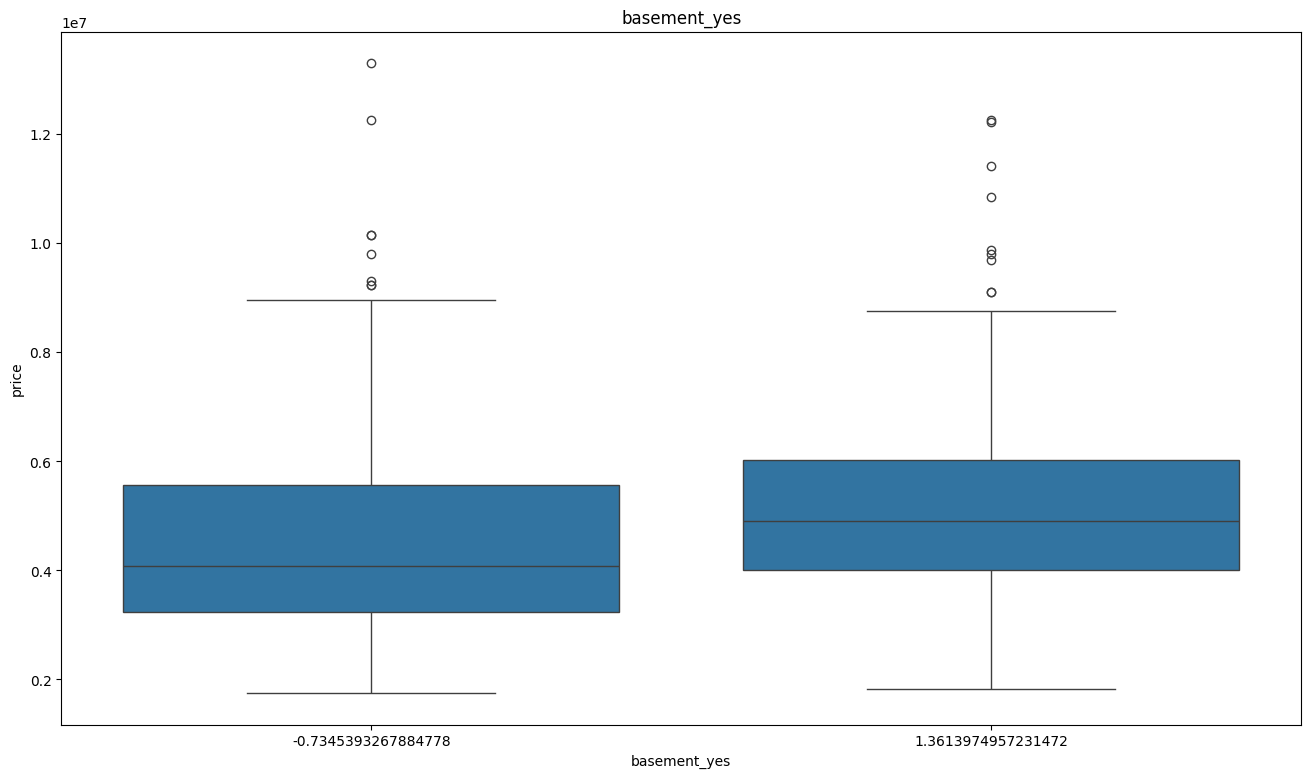

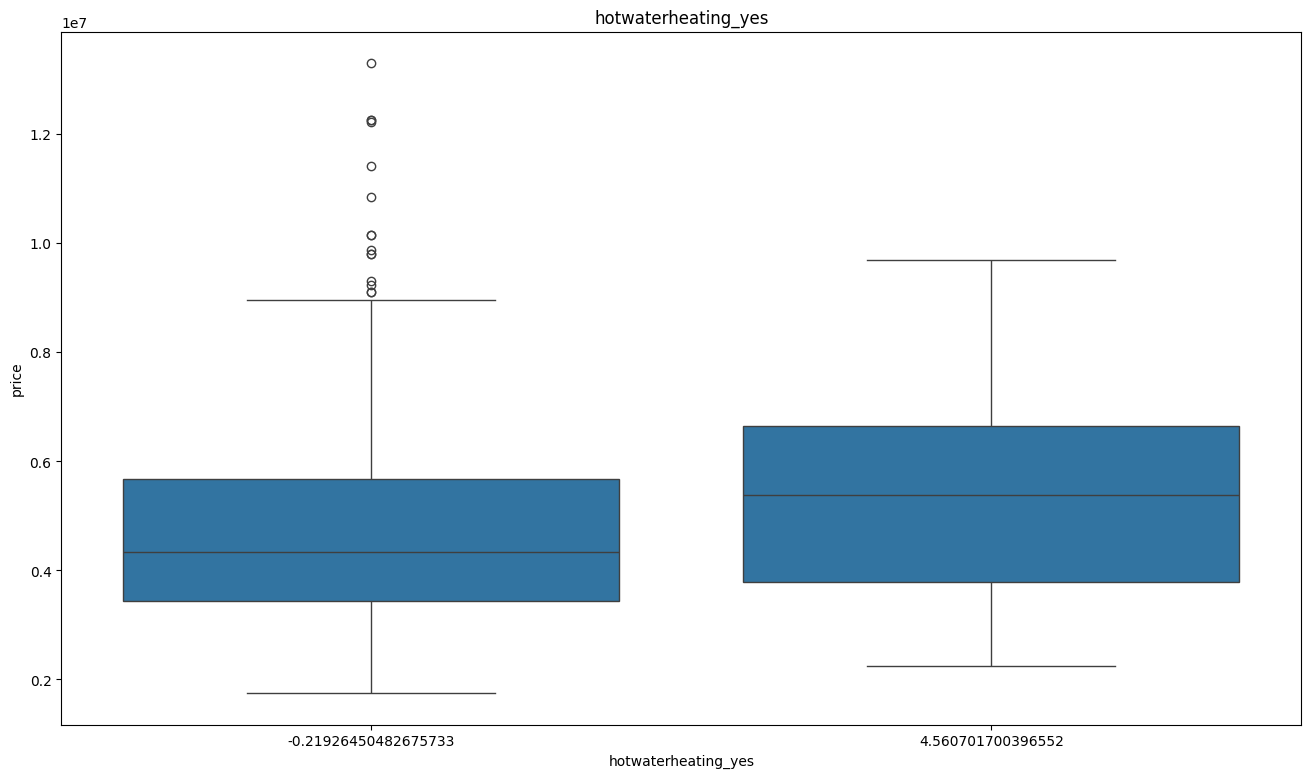

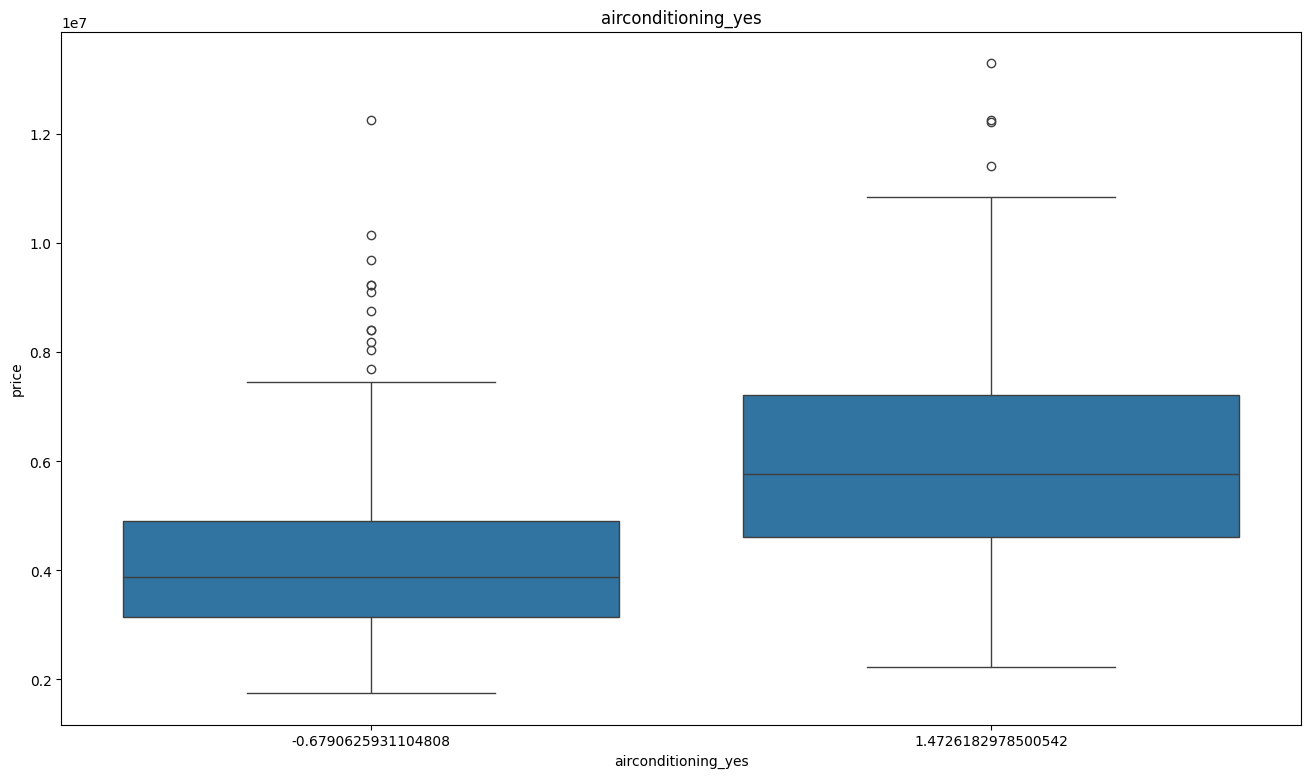

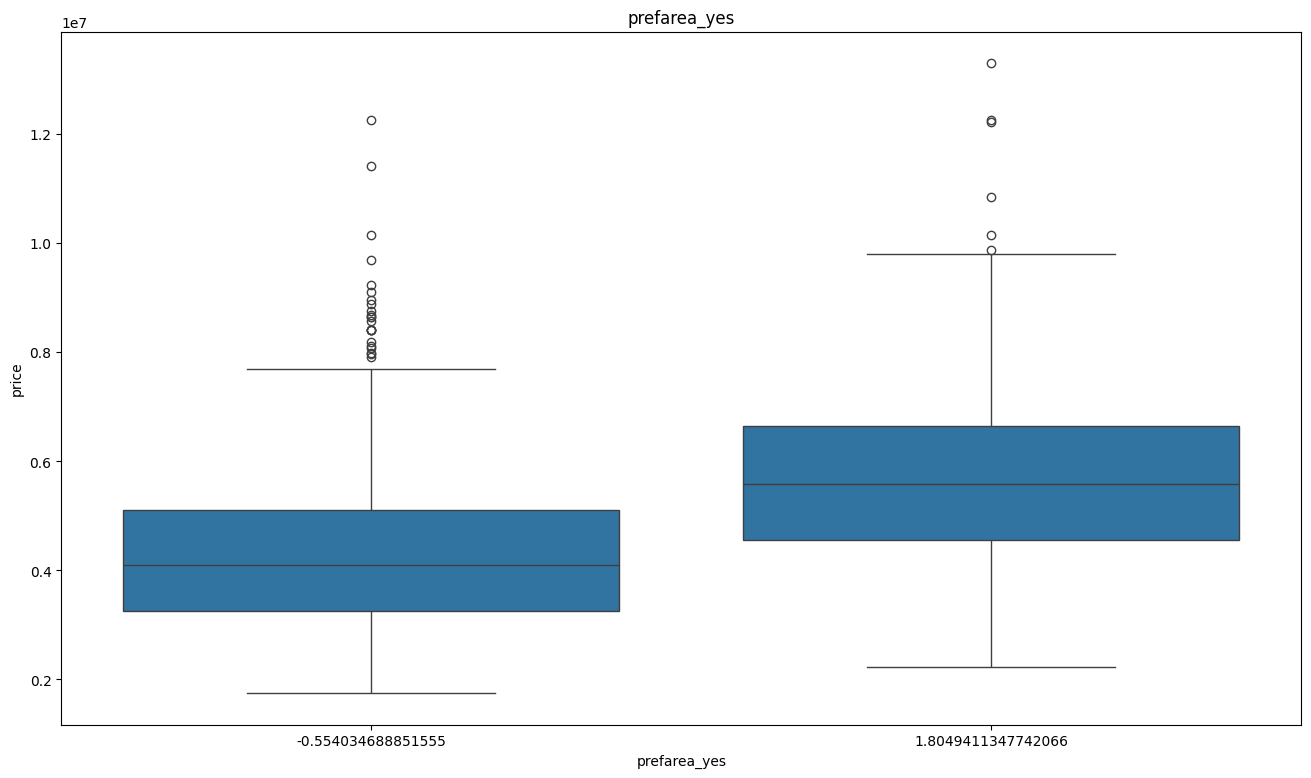

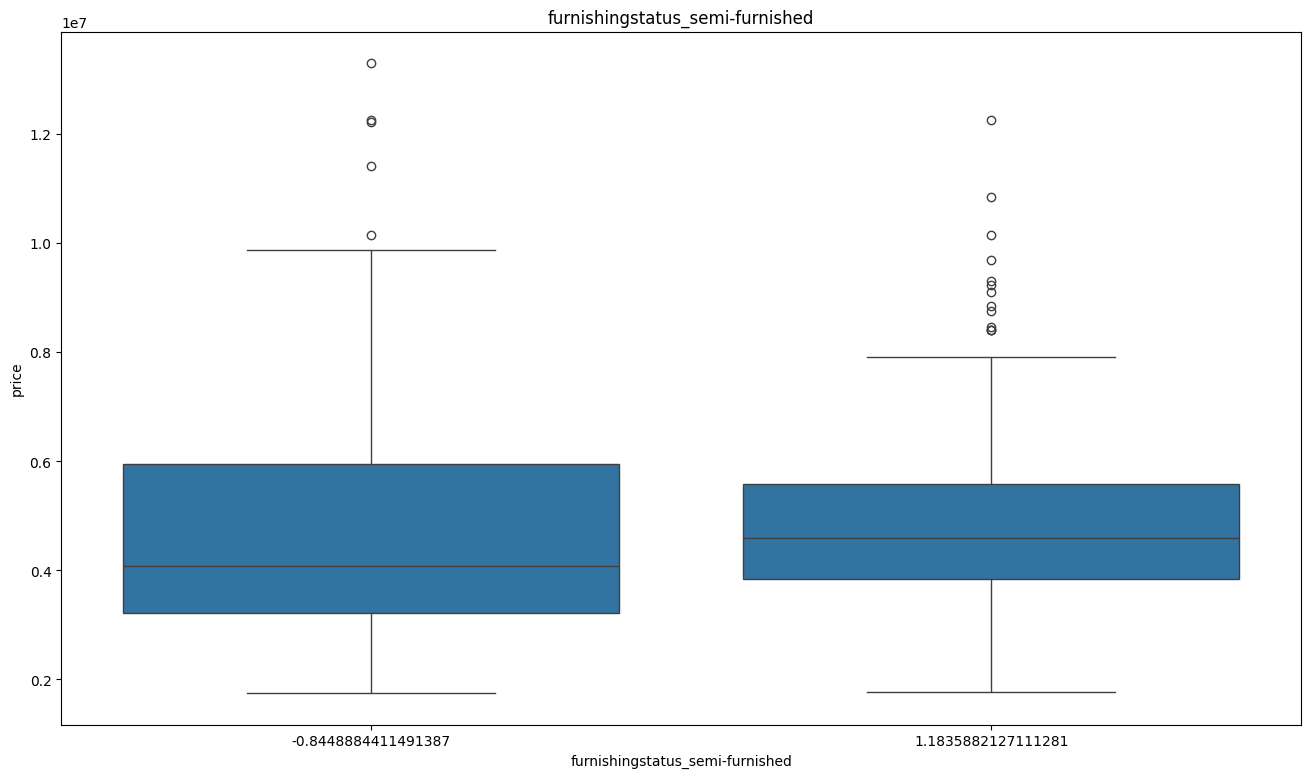

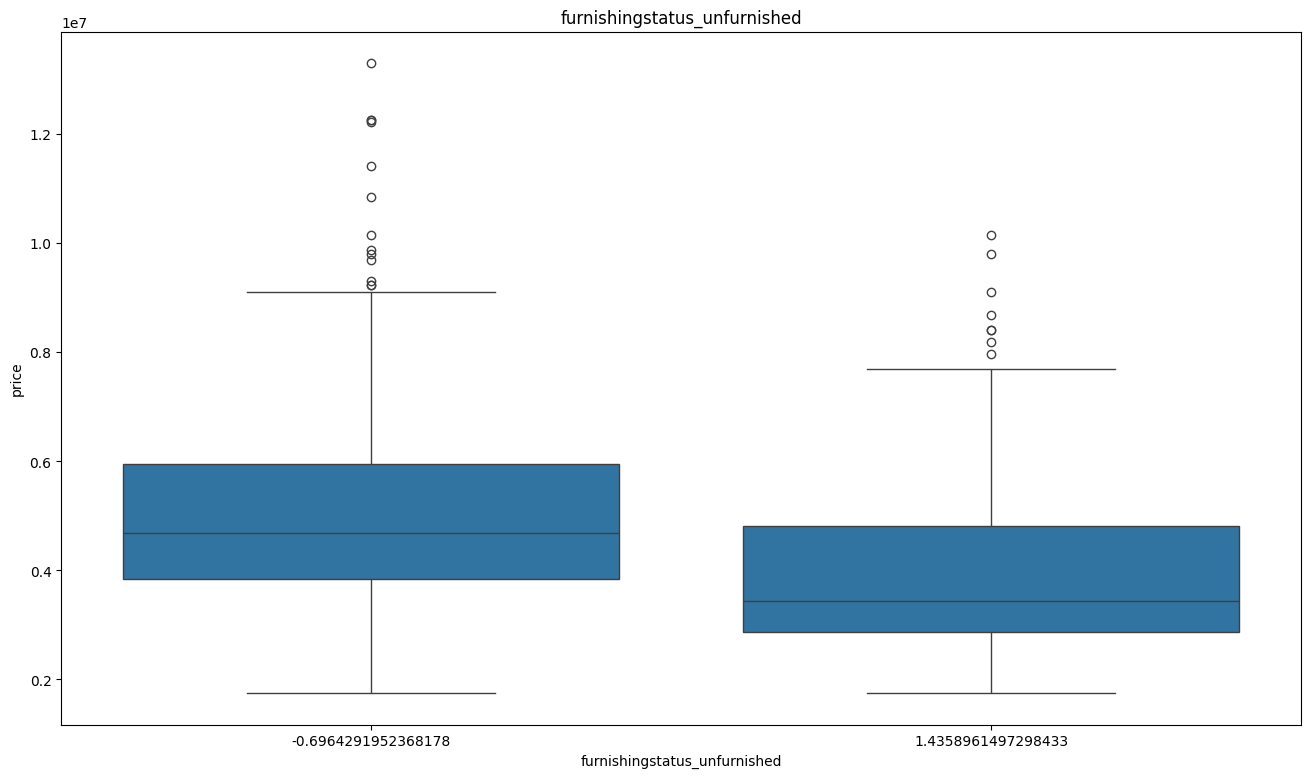

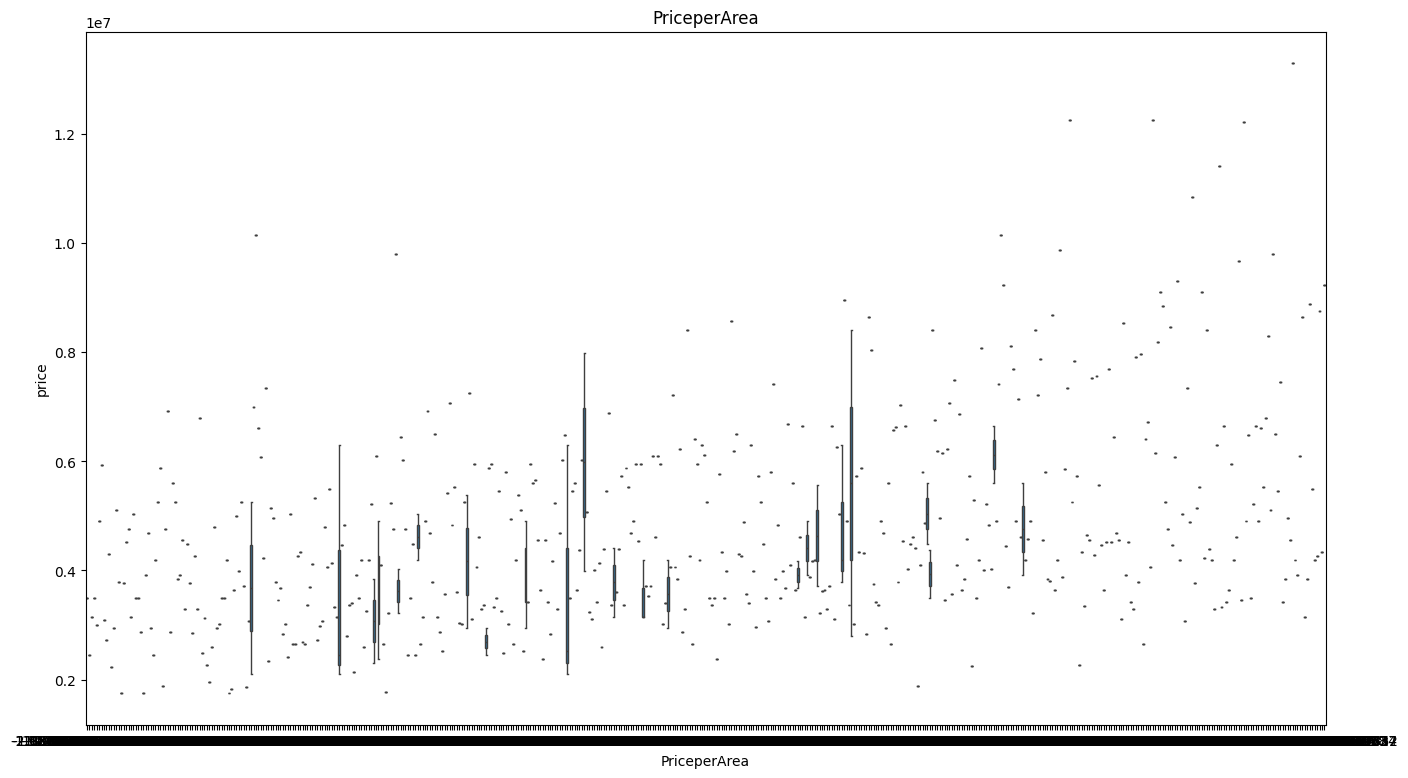

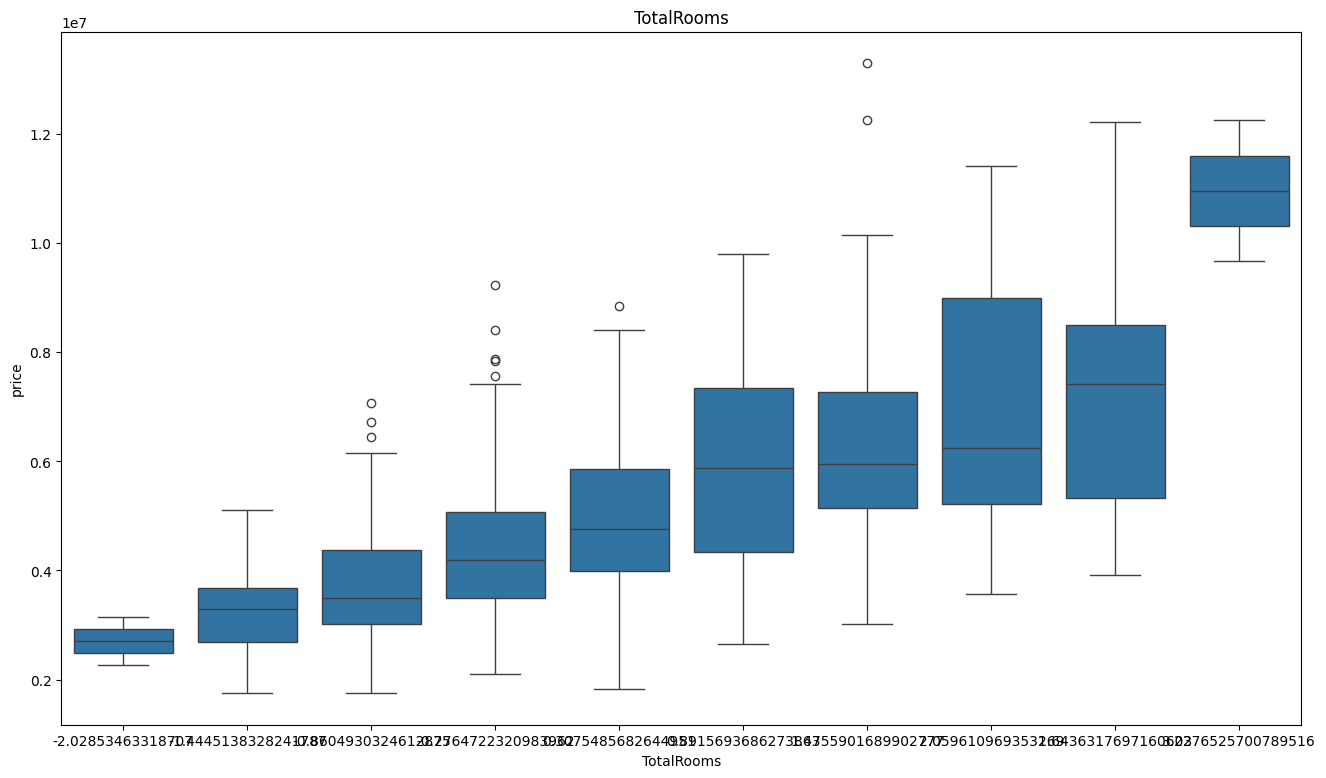

In [ ]:
import seaborn as sns

for feature in df_encoded.columns:
    plt.figure(figsize=(16, 9))
    sns.boxplot(x=df_encoded[feature], y=df['price'])
    plt.title(feature)
    plt.show()

<Figure size 1600x900 with 0 Axes>

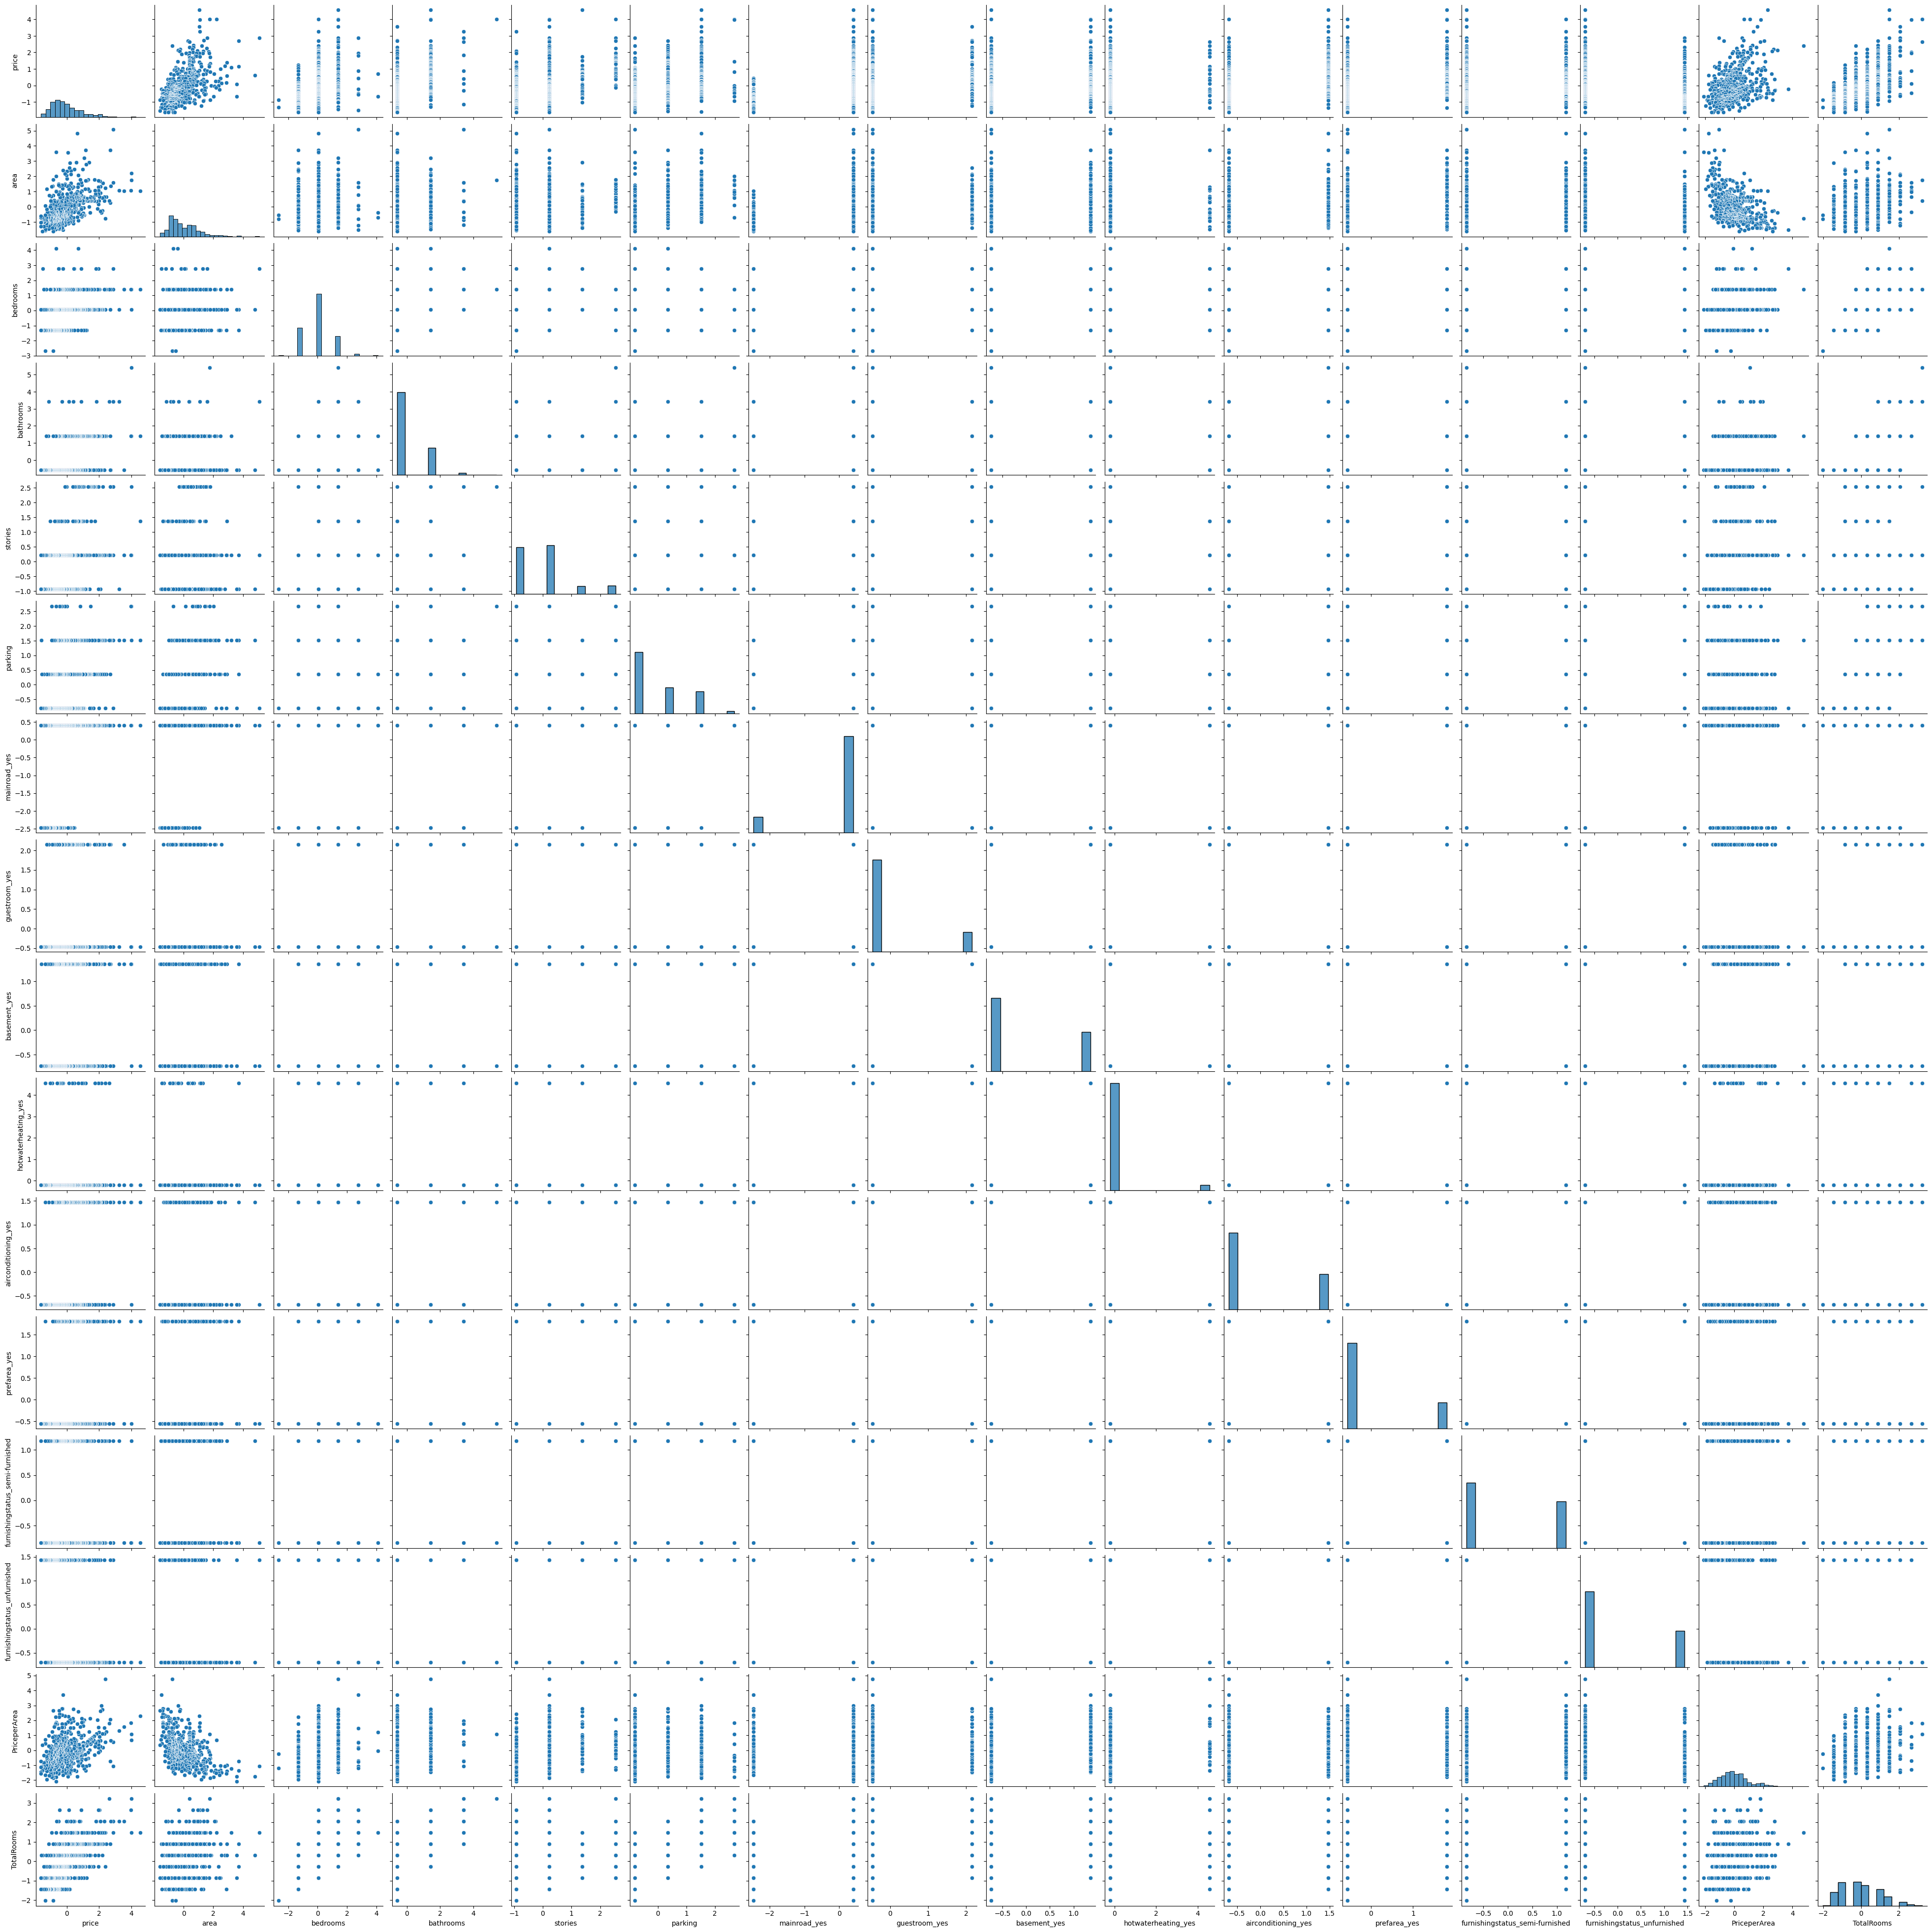

In [ ]:
plt.figure(figsize=(16, 9))
sns.pairplot(df_encoded[df_encoded.columns])
plt.show()

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [ ]:
from sklearn.metrics import accuracy_score

y_train_pred = svm_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {train_accuracy * 100:.2f}%')

y_val_pred = svm_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

y_test_pred = svm_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Train Accuracy: 76.15%
Validation Accuracy: 81.65%
Test Accuracy: 97.25%


In [ ]:
X_train.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'furnishingstatus_semi-furnished',
       'furnishingstatus_unfurnished', 'PriceperArea', 'TotalRooms'],
      dtype='object')

In [ ]:
y_train.shape

(327, 1)

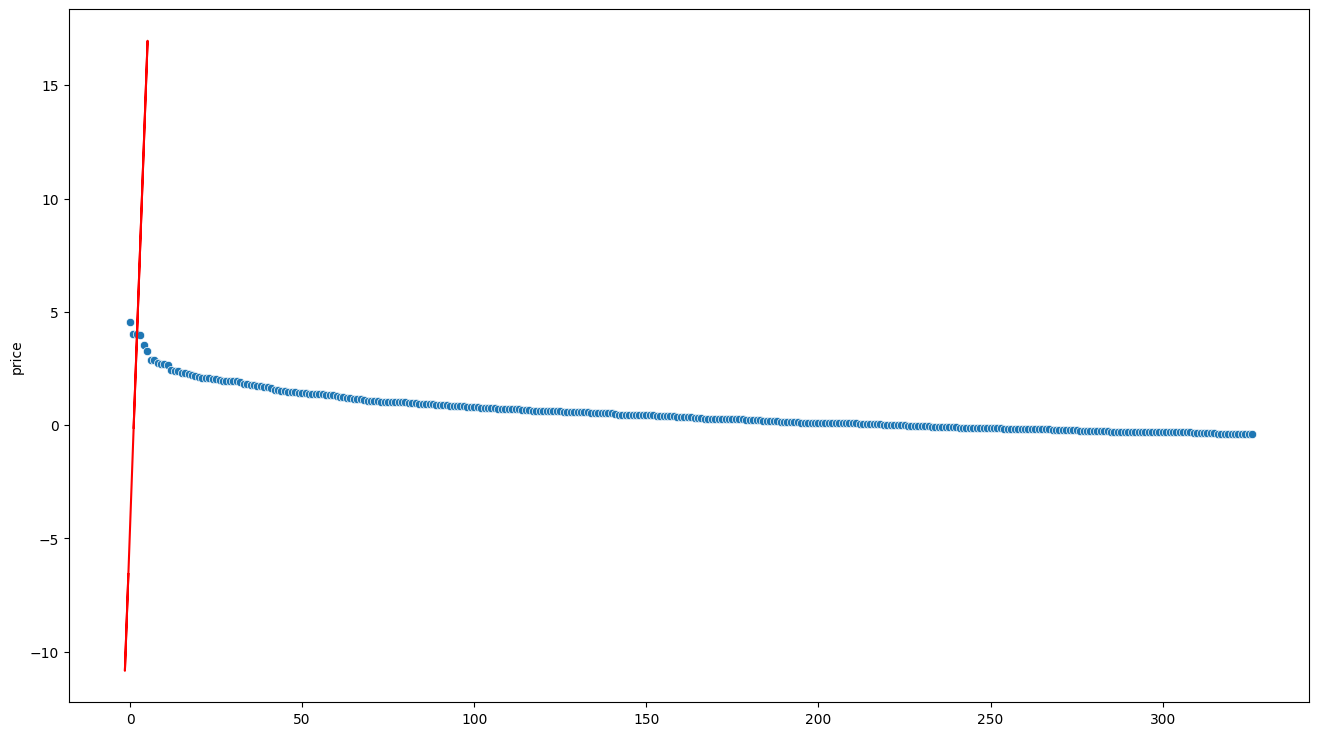

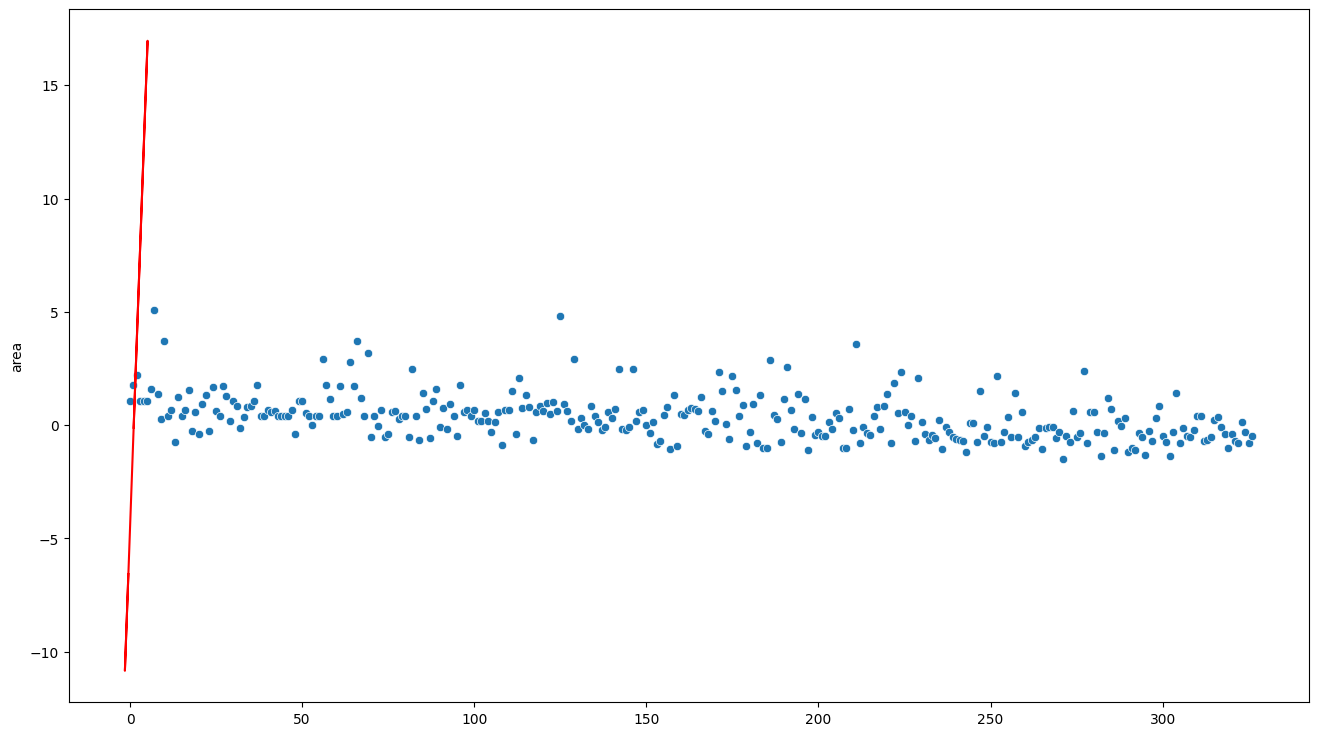

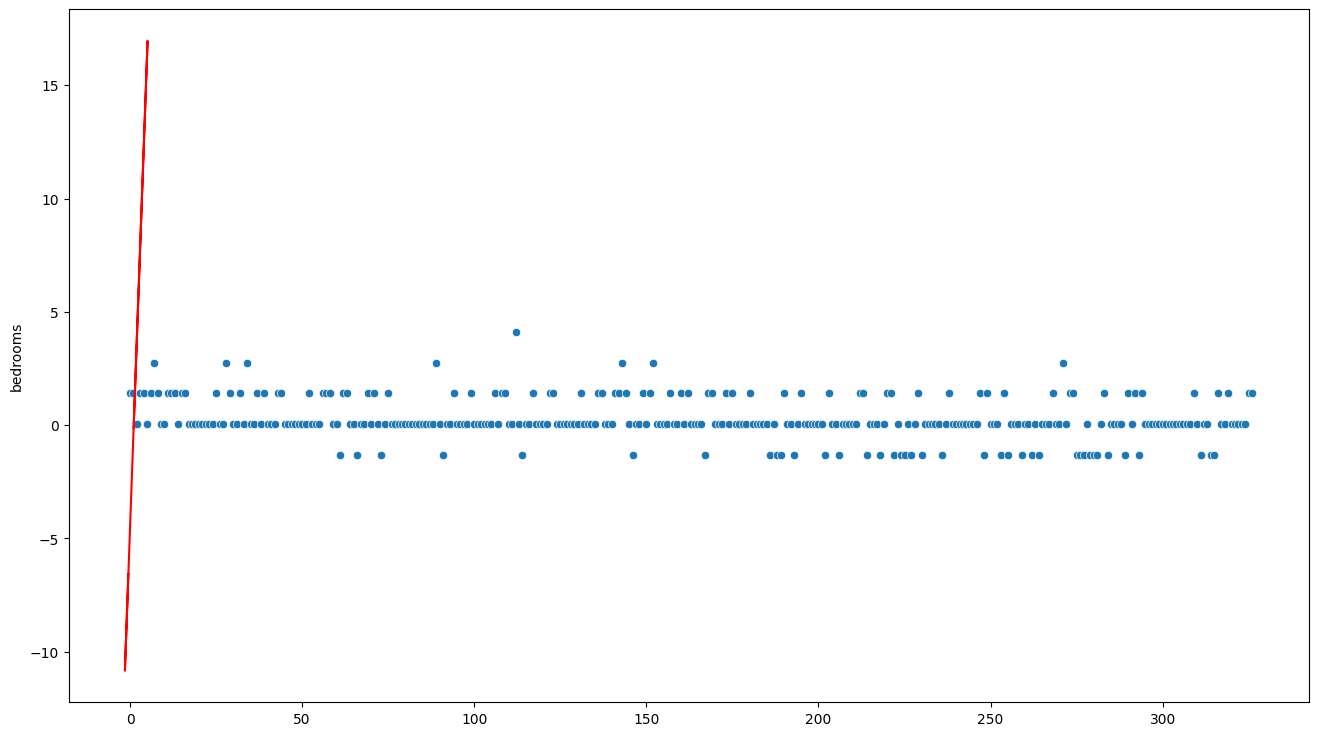

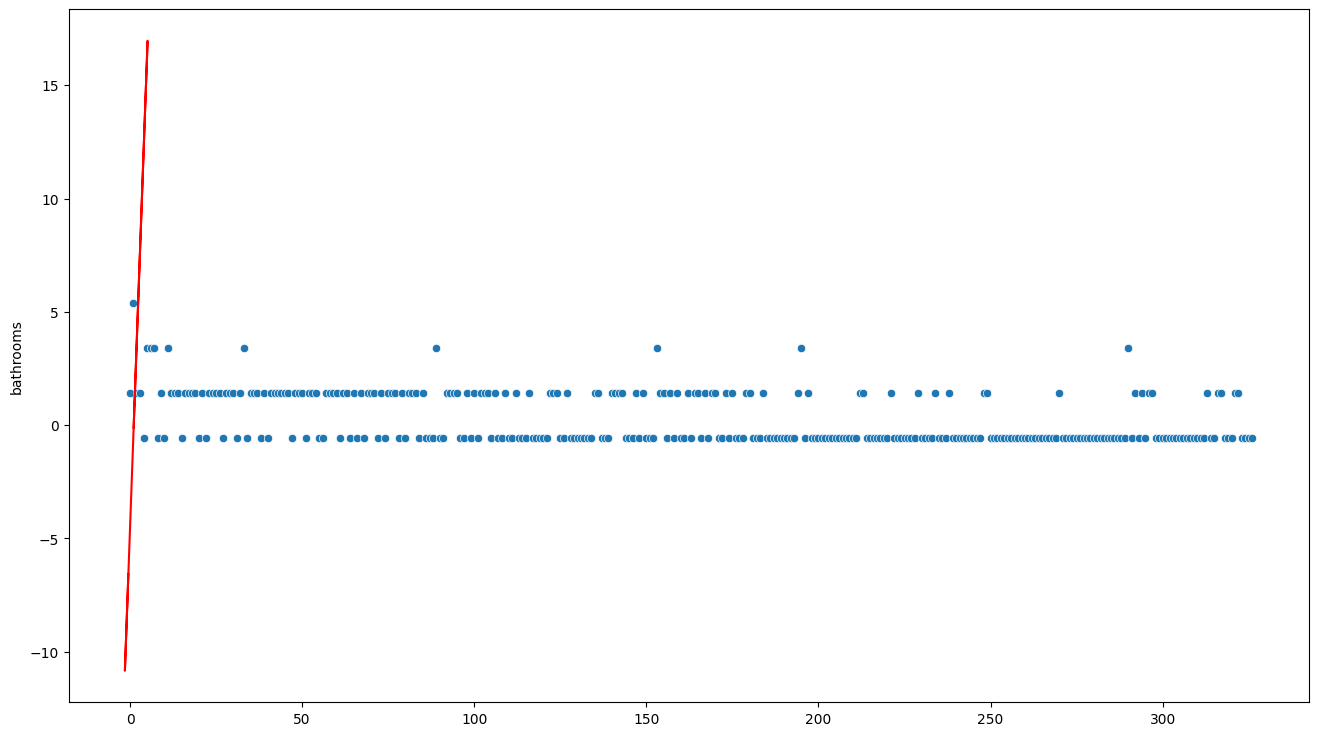

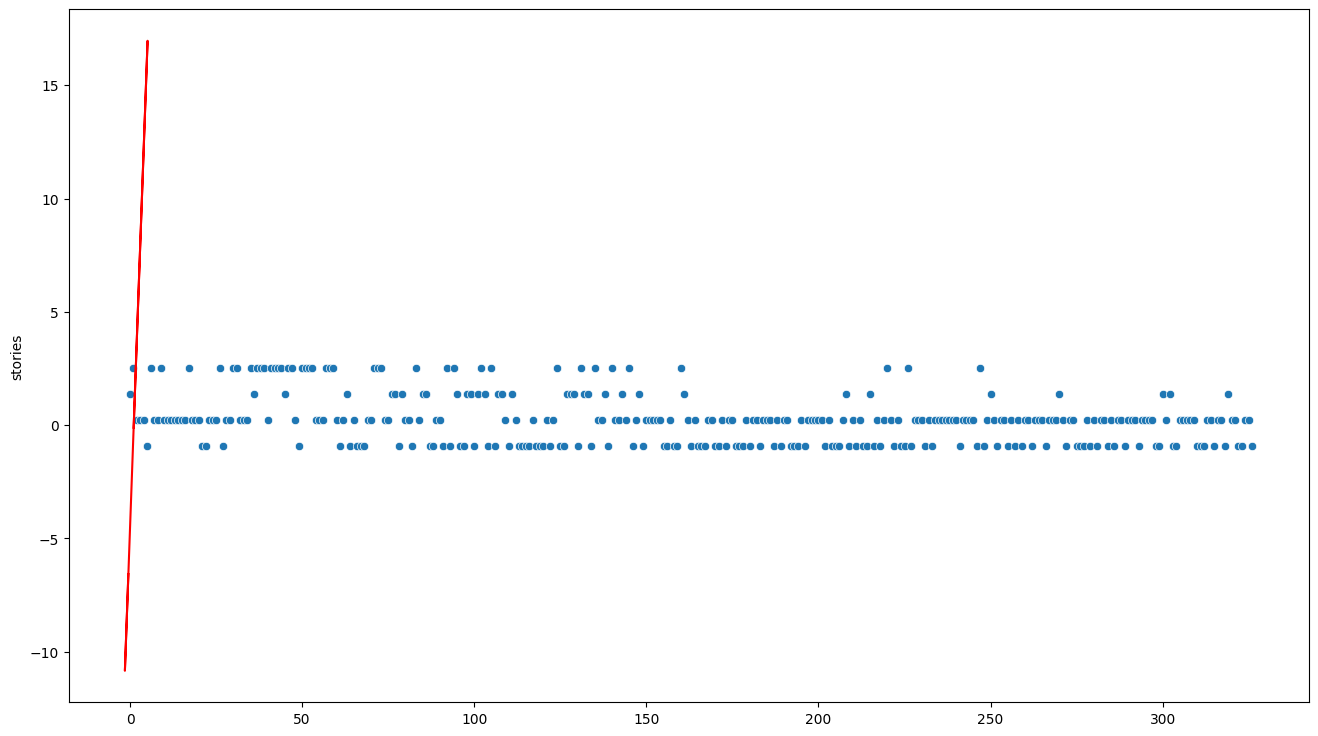

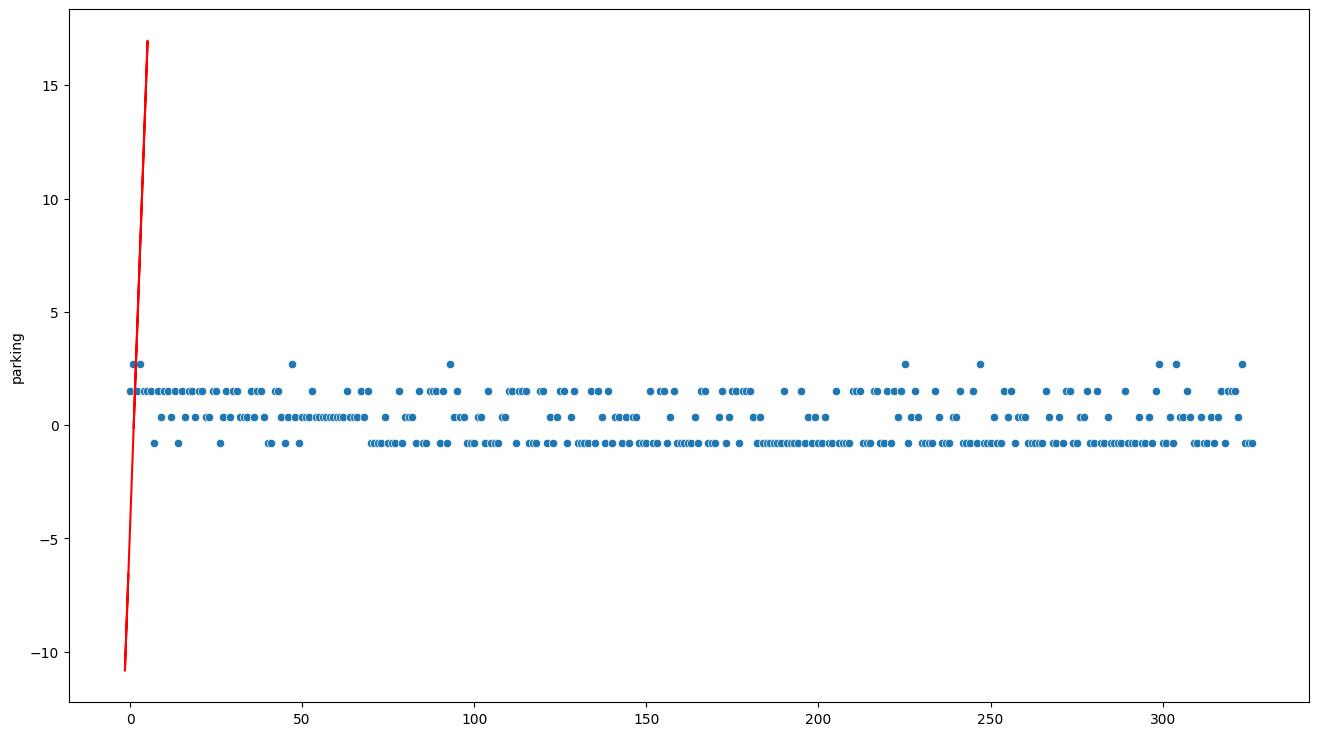

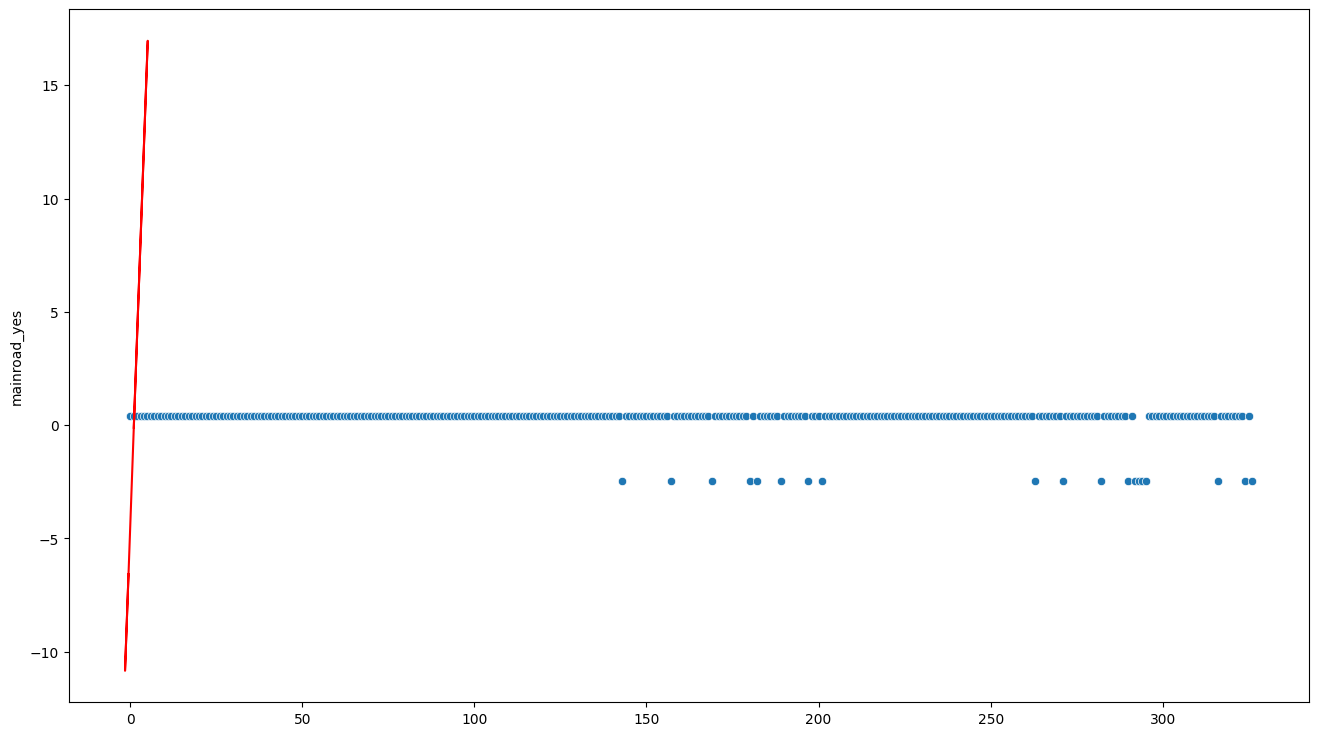

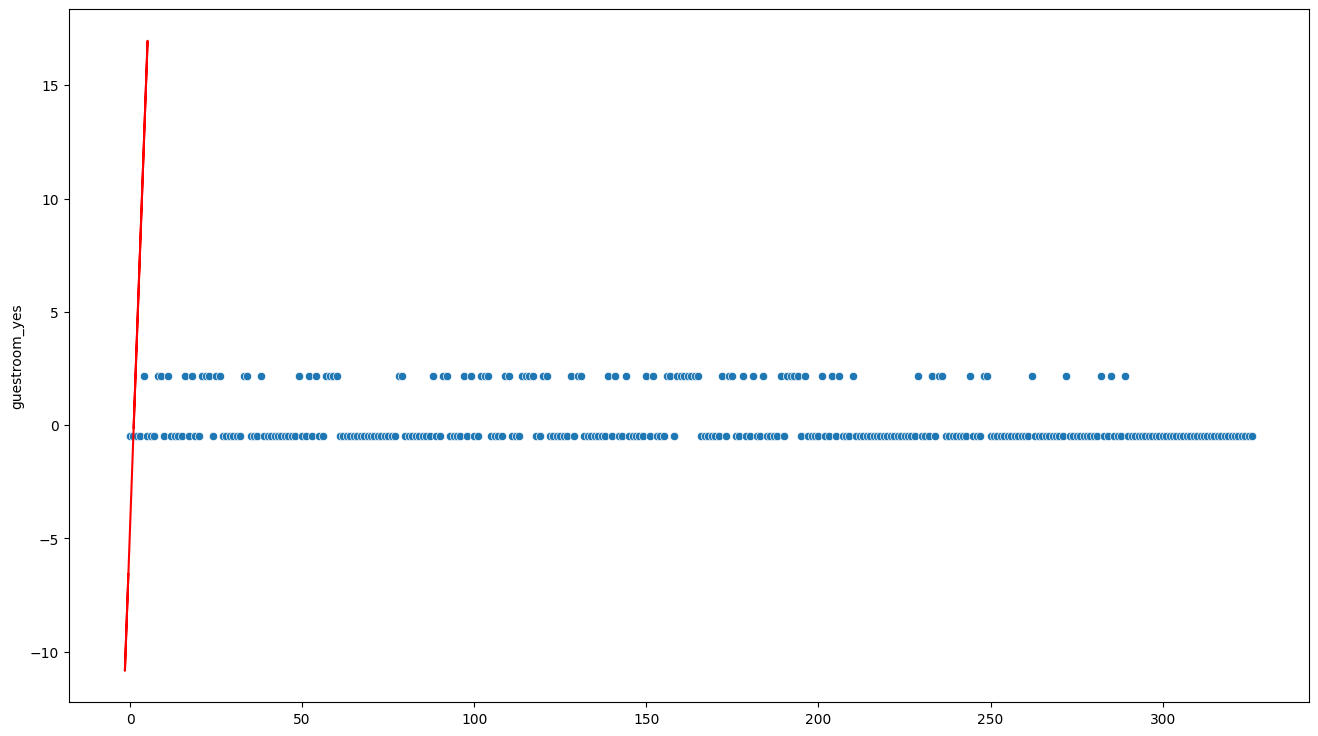

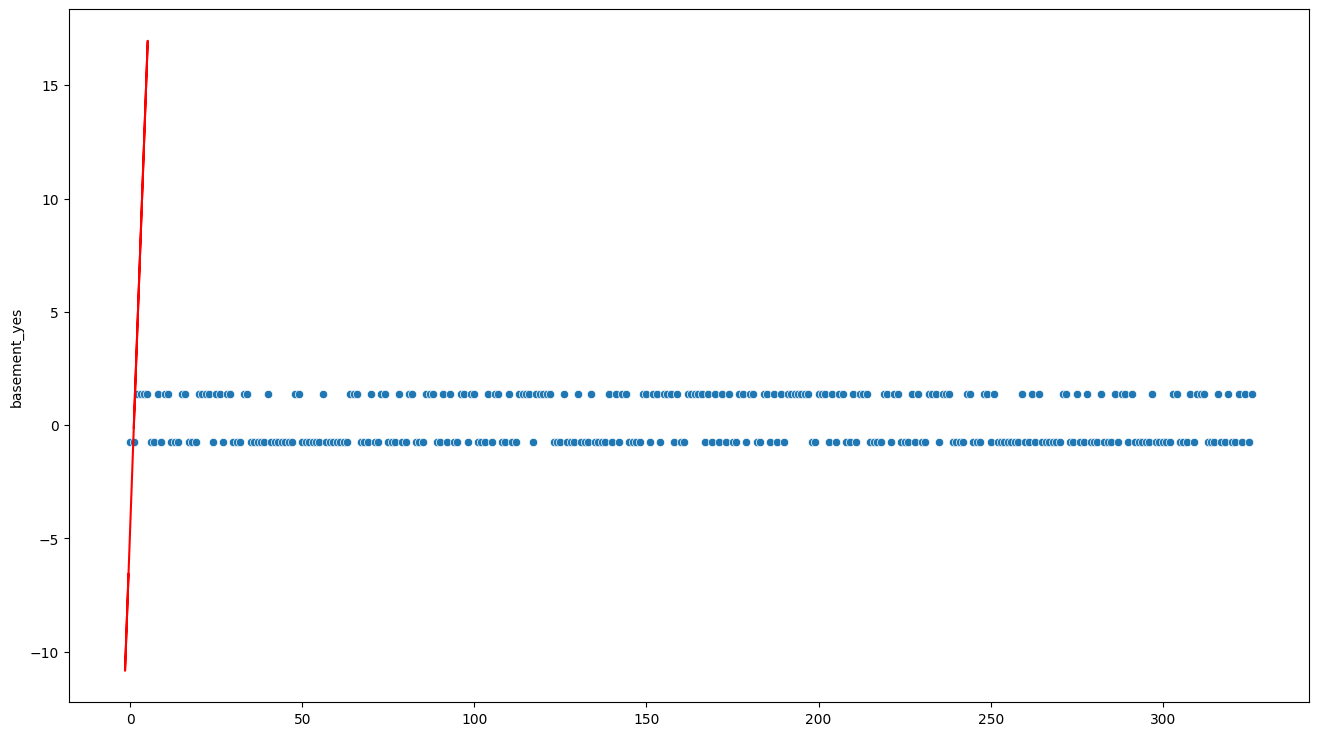

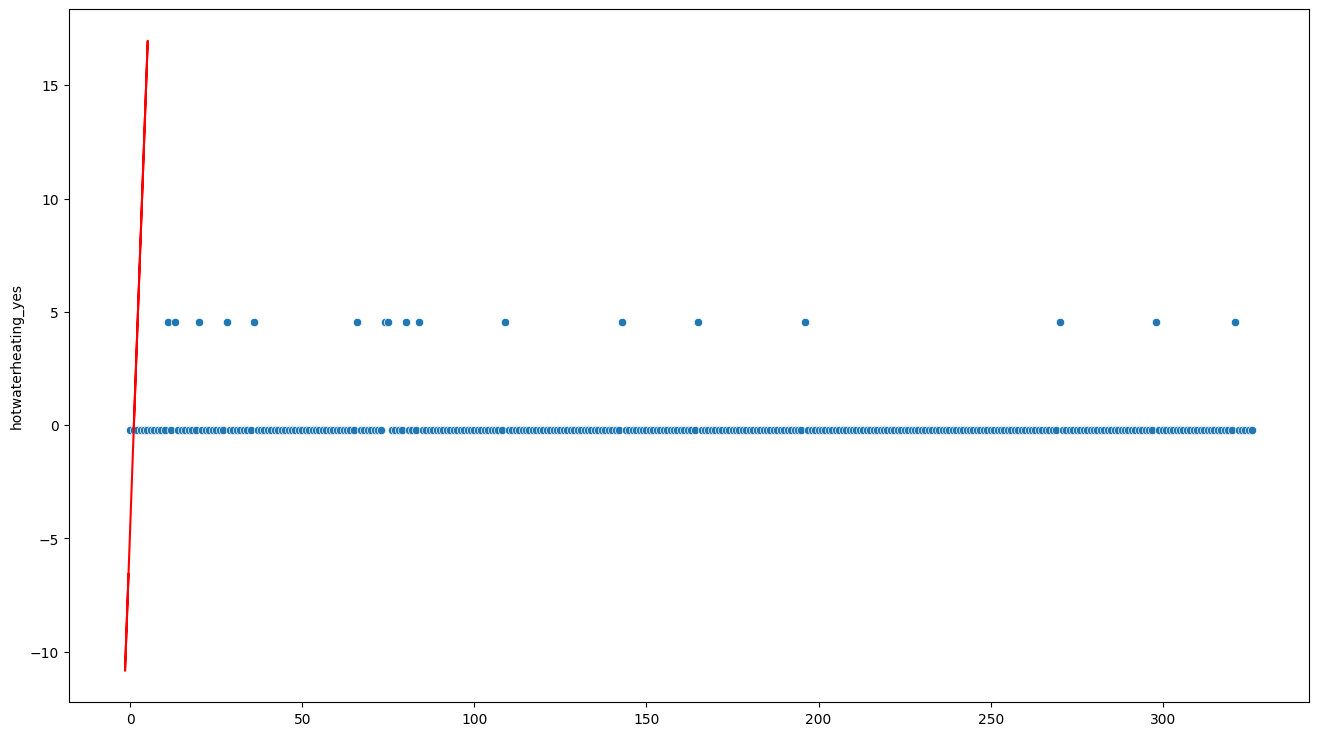

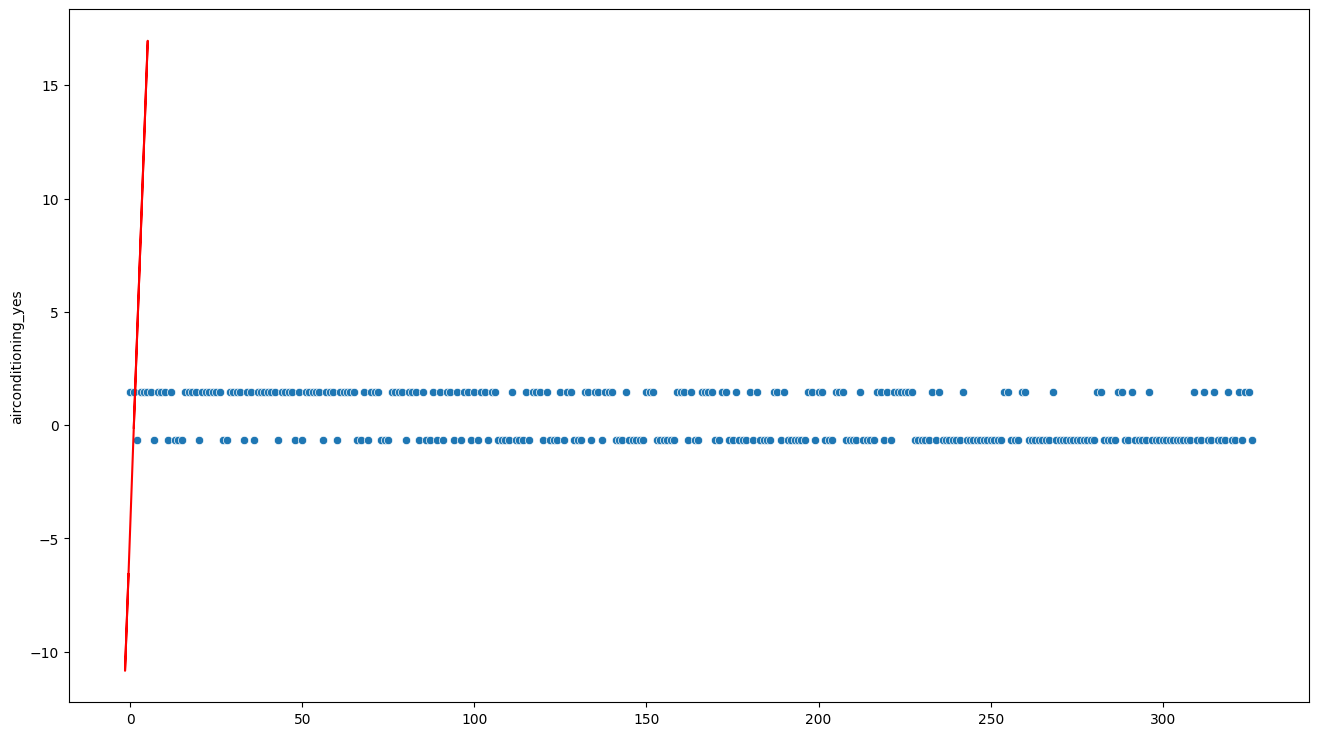

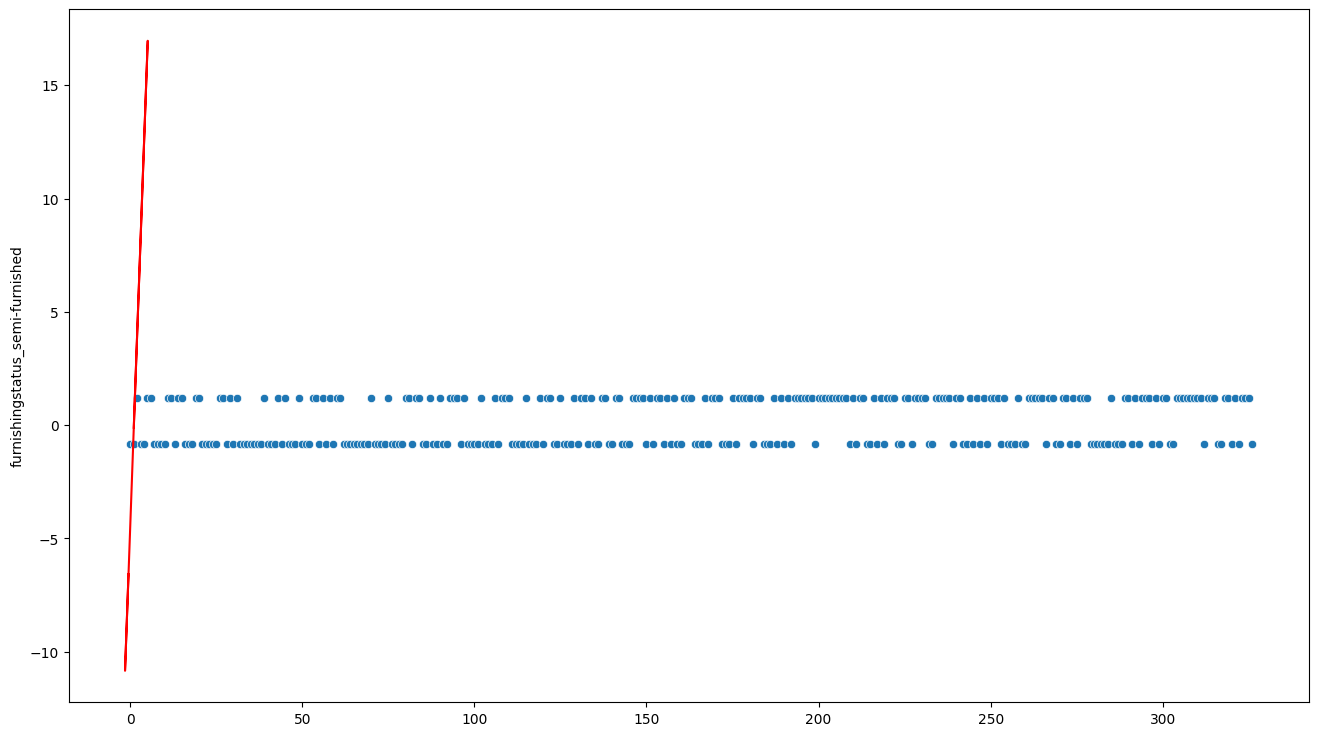

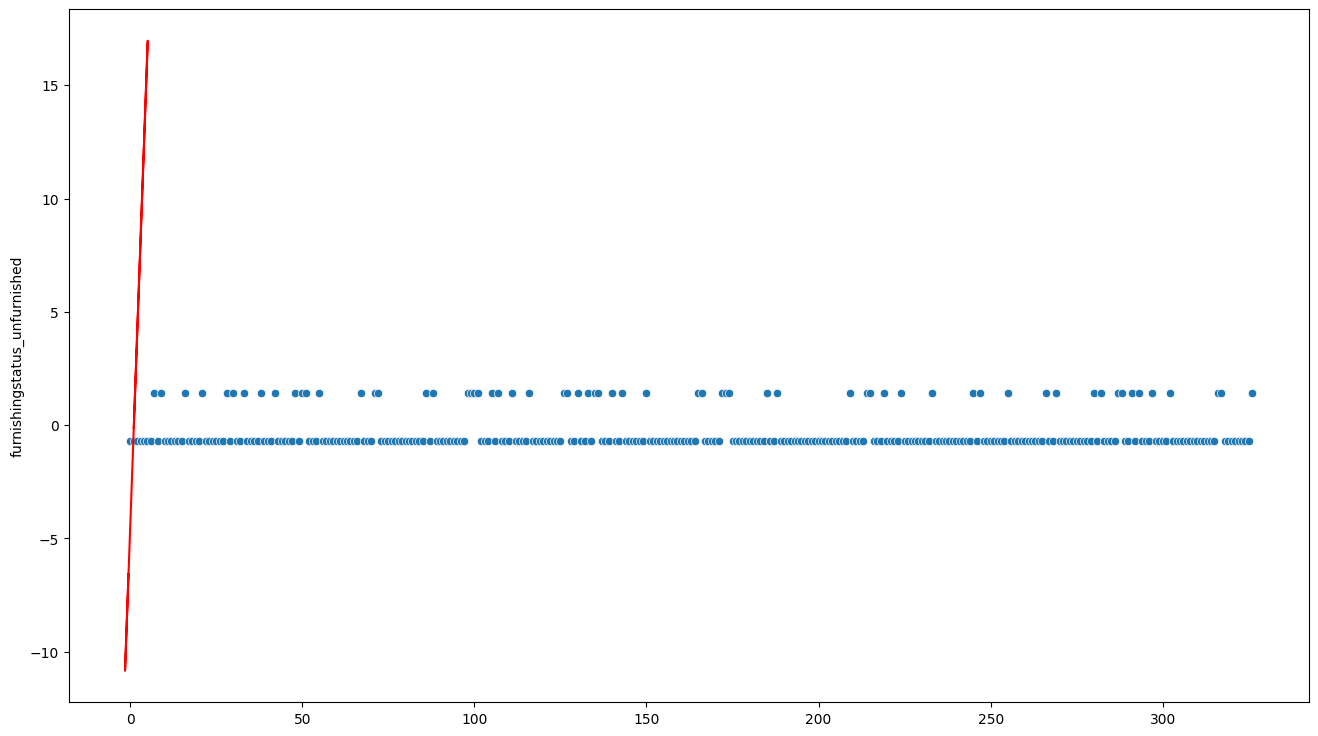

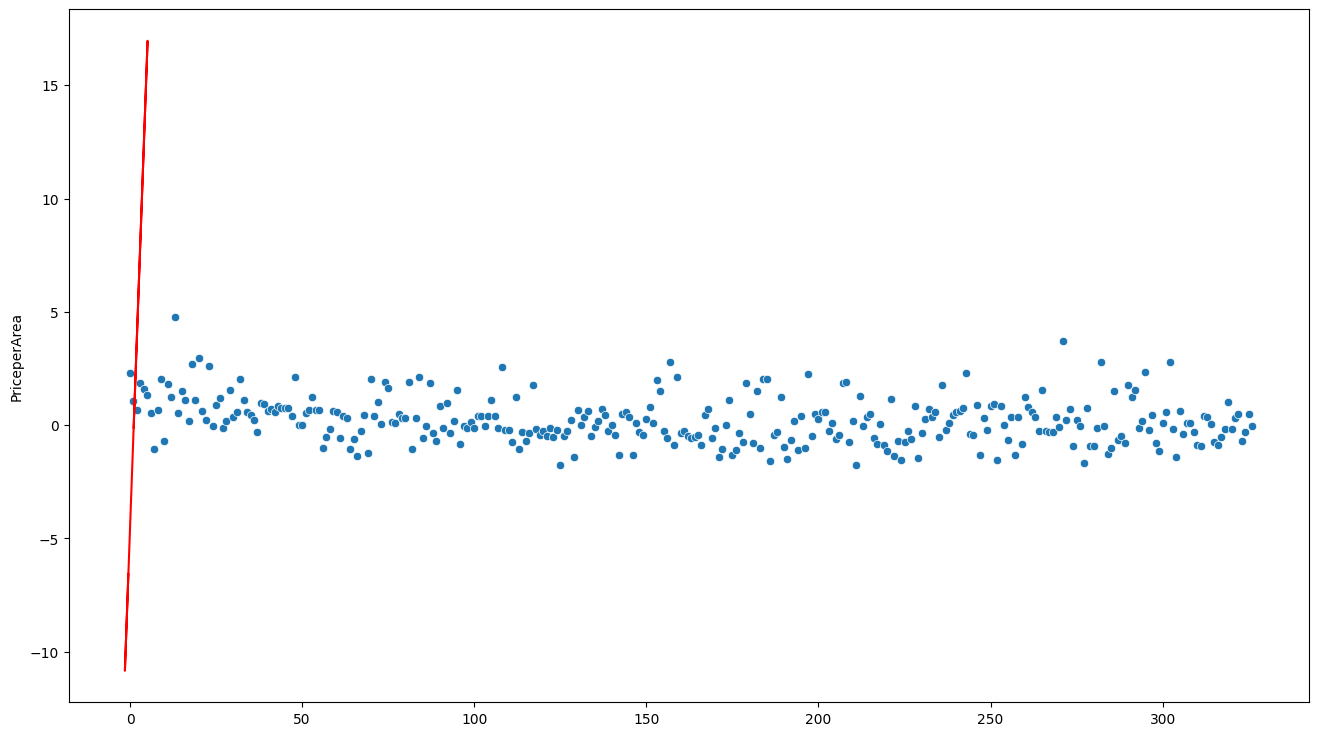

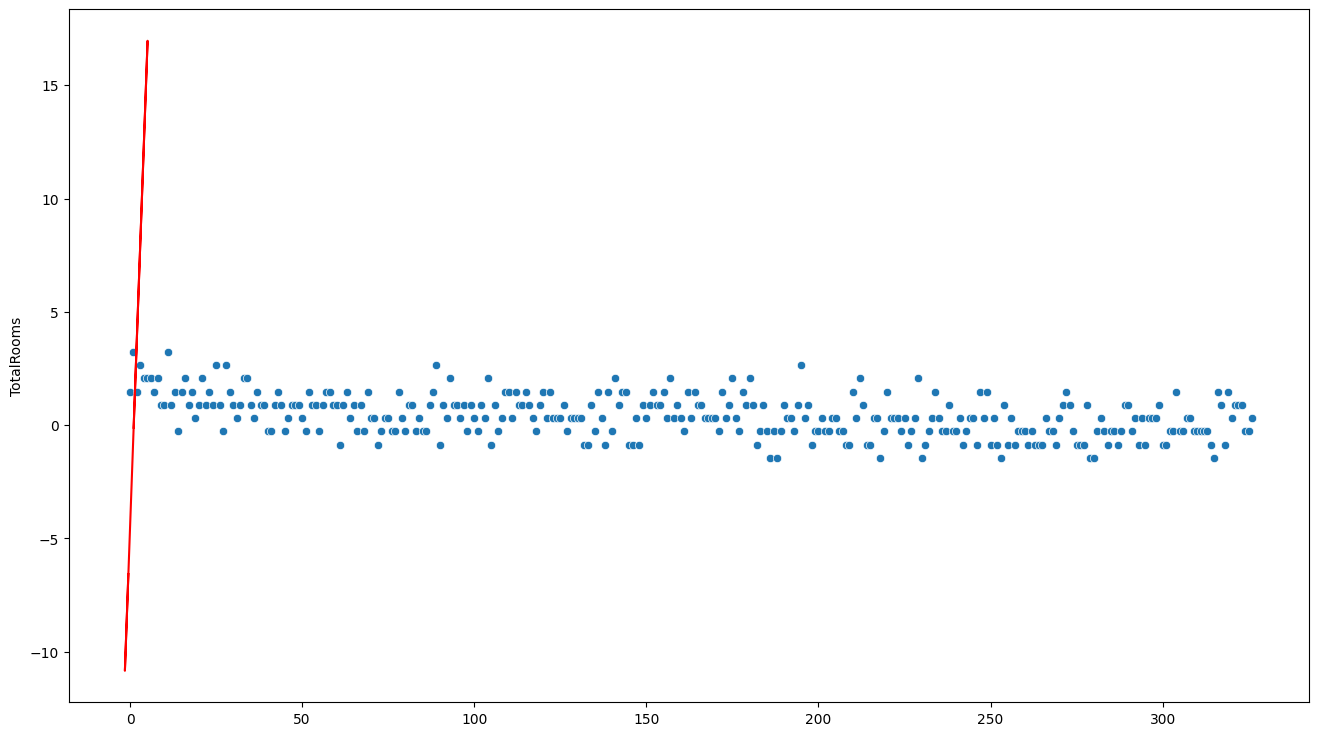

In [ ]:
import numpy as np

for col in X_train.columns:
  plt.figure(figsize=(16, 9))
  sns.scatterplot(X_train[col])
  w = svm_model.coef_[0]
  b = svm_model.intercept_[0]
  x_points = X_train['area']
  y_points = -(w[0] / w[1]) * x_points - b / w[1]
  plt.plot(x_points, y_points, color='red')
  plt.show()